In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
from akita_utils.format_io import h5_to_df

In [3]:
import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from reading_averaging_utils import average_stat_over_targets

In [4]:
# stat metric the analysis is based on
stat_of_analysis_interest = "SCD"
data_dir = "/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_pairwise_mutagenesis"

In [5]:
keys_to_ignore = ["disruption_SCD",
                 "insertion_SCD"]

In [6]:
# reading and averaging data for model 0, bg 0
df_m0_bg0 = h5_to_df(data_dir+"/top100_model_0.h5", ["SCD", "INS-16", "INS-64"], average=False, ignore_keys=keys_to_ignore) 

In [7]:
df_m0_bg0_tg = average_stat_over_targets(df_m0_bg0, model_index=0, head_index=1, stat=stat_of_analysis_interest)

## Separate Plot for Each Site

In [9]:
grouped = df_m0_bg0_tg.groupby(["chrom", "start", "end", "strand"])

In [12]:
# Determine global min and max SCD_m0 values for the color scale
global_min_scd = df_m0_bg0_tg["SCD_m0"].min()
global_max_scd = df_m0_bg0_tg["SCD_m0"].max()

chr1 78724639 78724658 +


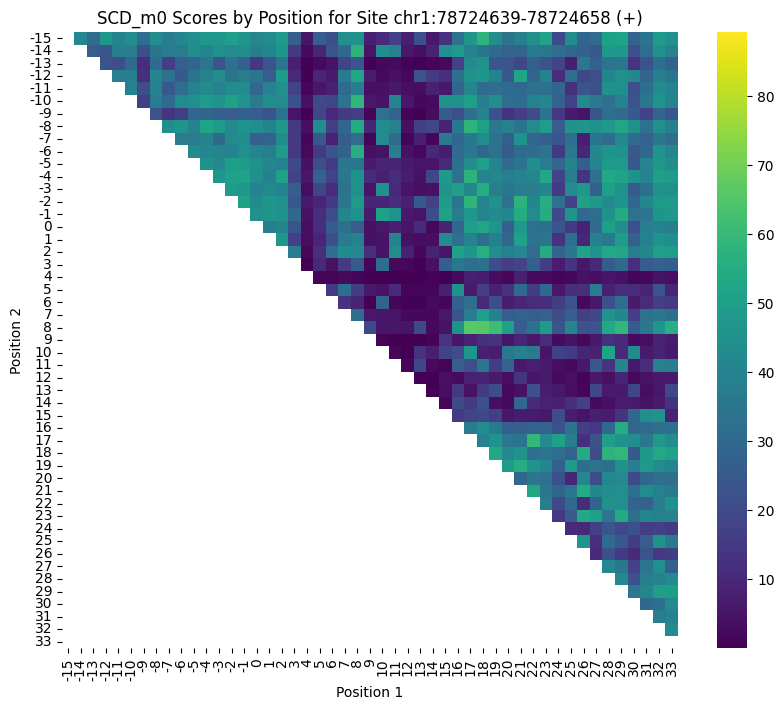

chr1 86598680 86598699 +


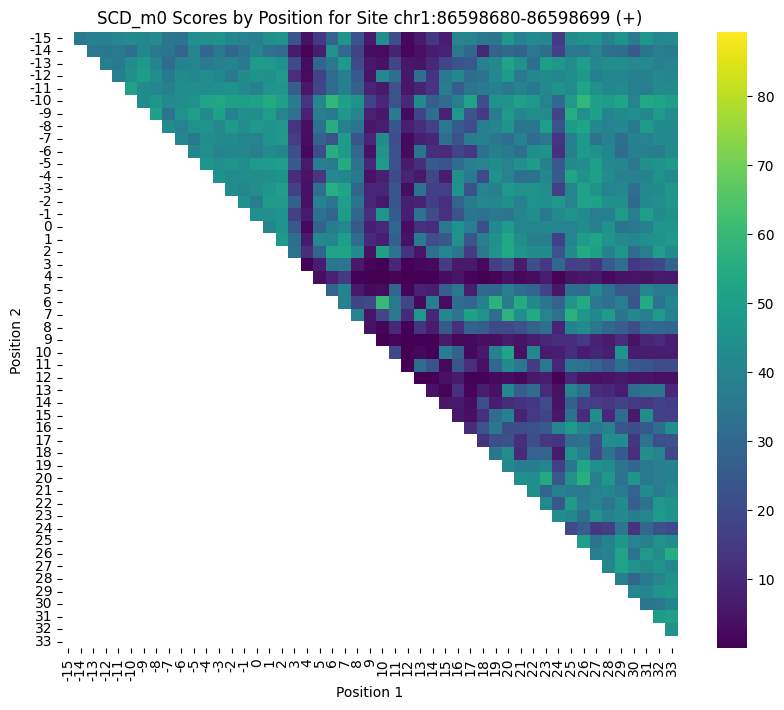

chr1 103799500 103799519 +


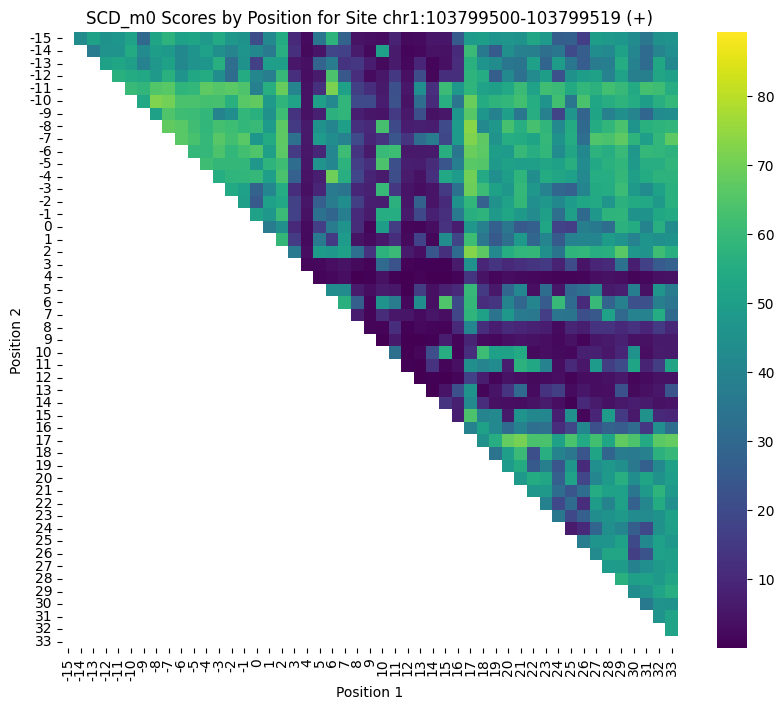

chr1 119087718 119087737 +


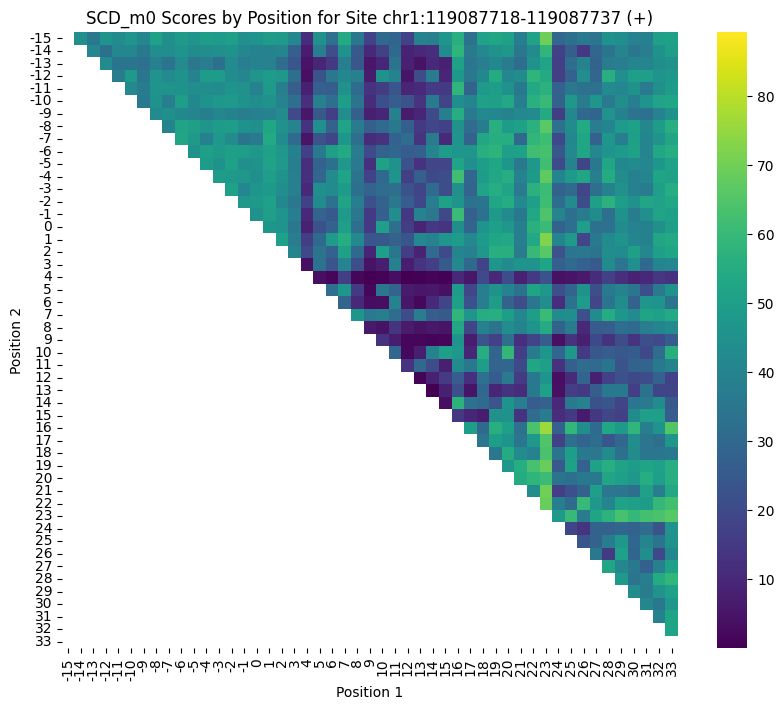

chr1 120586652 120586671 +


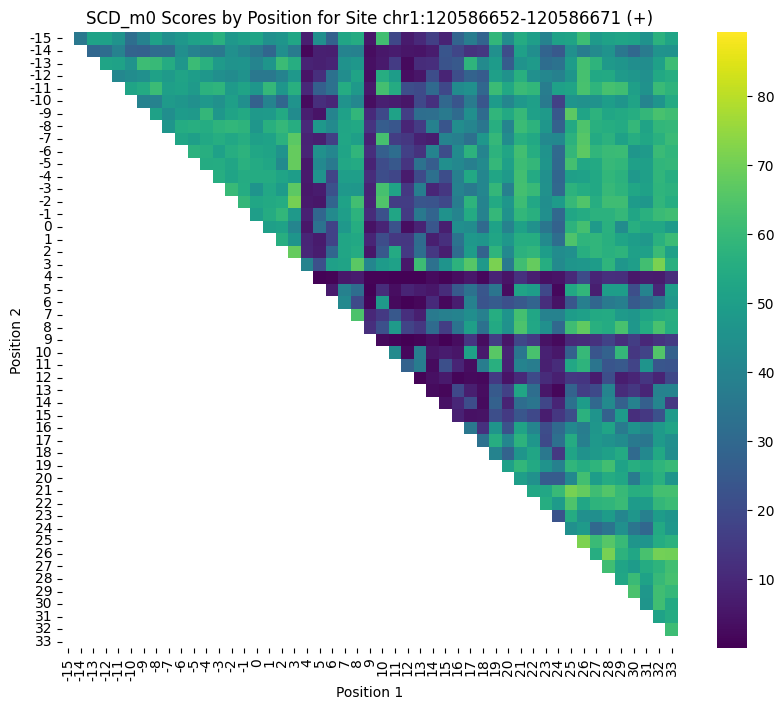

chr1 126993483 126993502 -


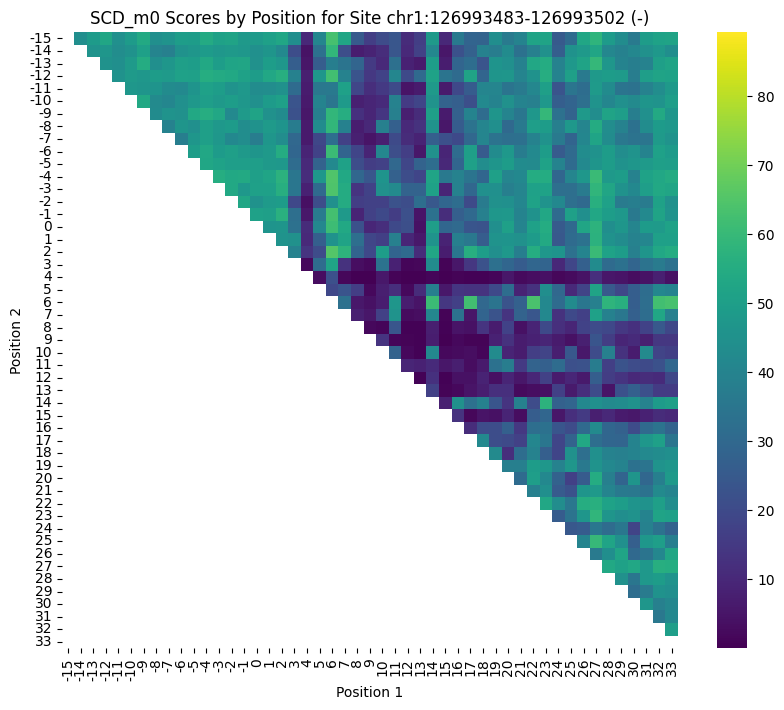

chr1 144380203 144380222 -


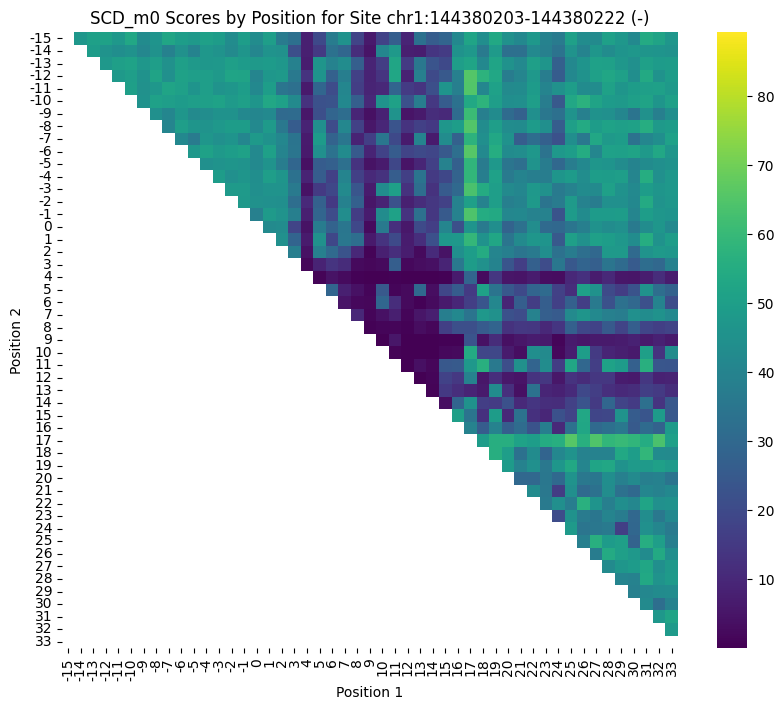

chr1 179477243 179477262 -


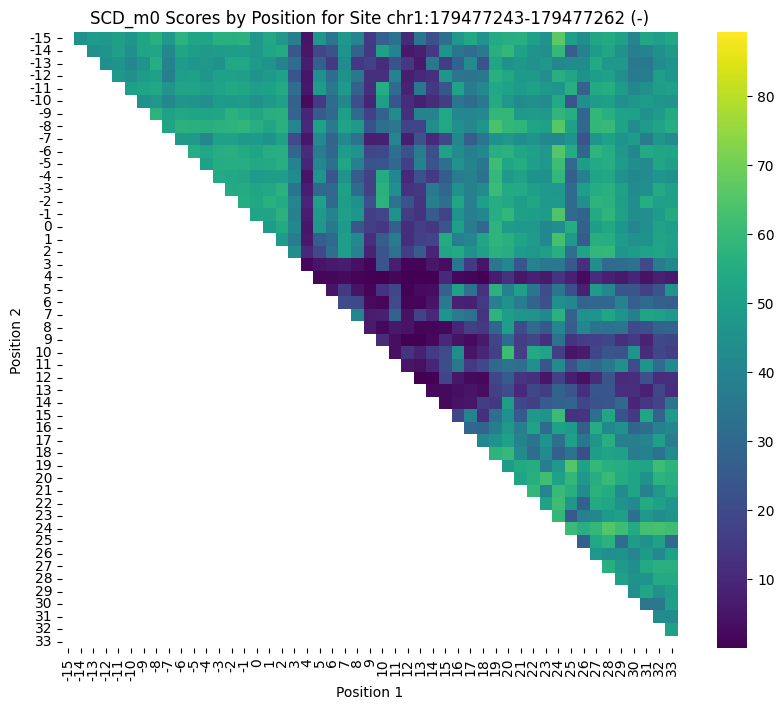

chr10 5161751 5161770 -


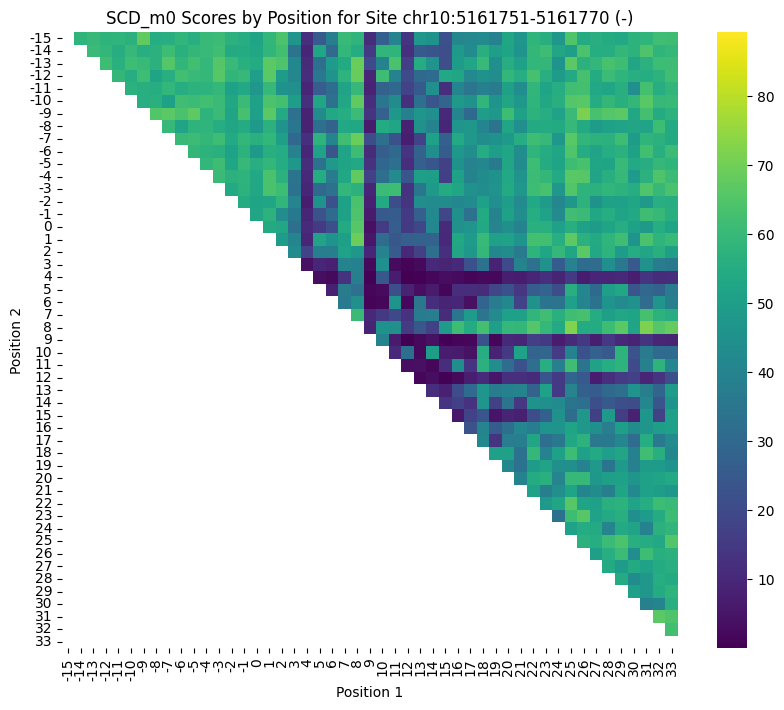

chr10 13016714 13016733 +


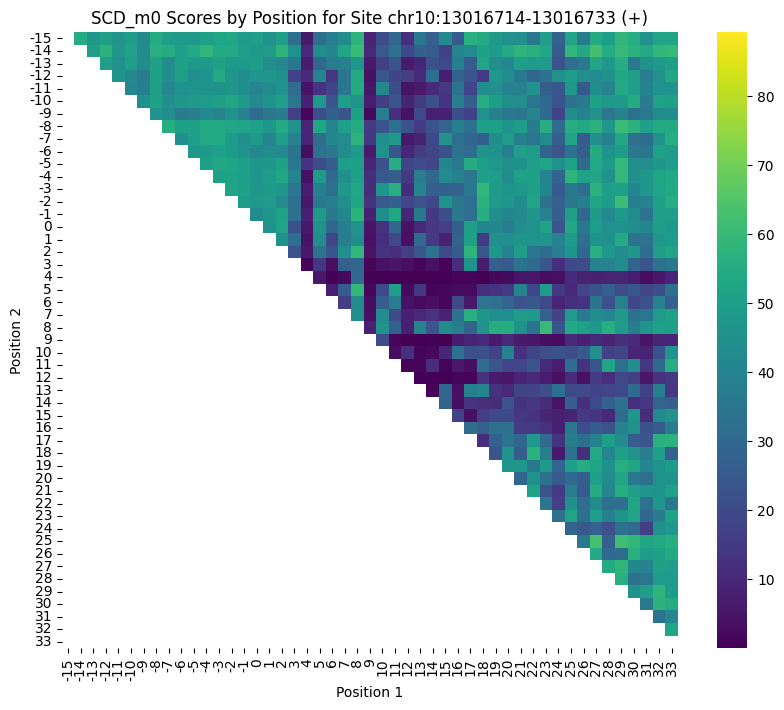

chr10 70963778 70963797 -


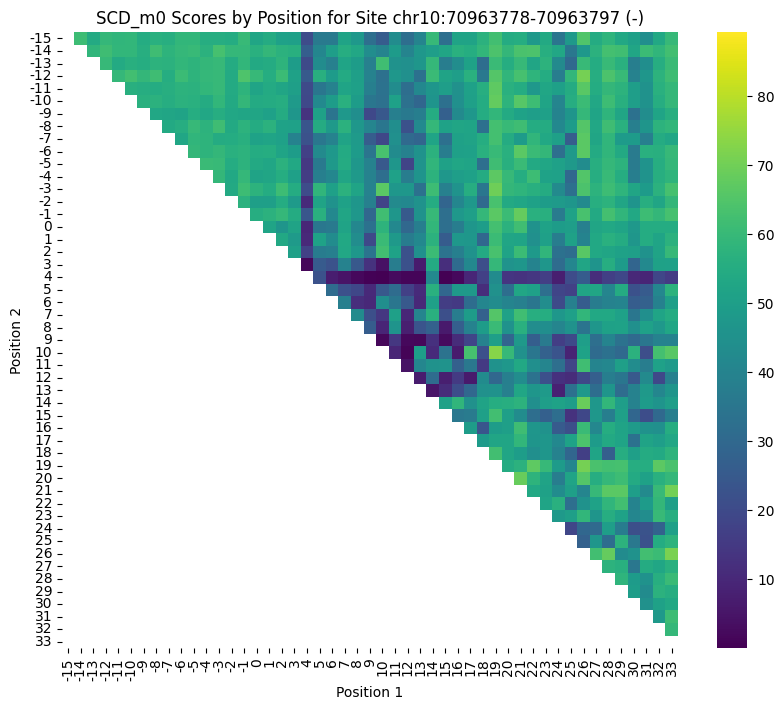

chr10 71422795 71422814 +


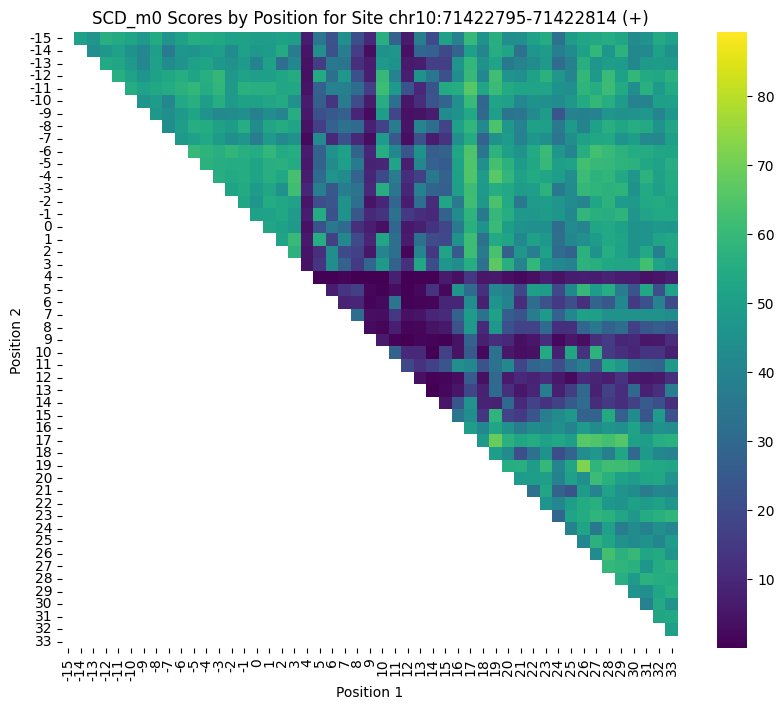

chr10 102449646 102449665 +


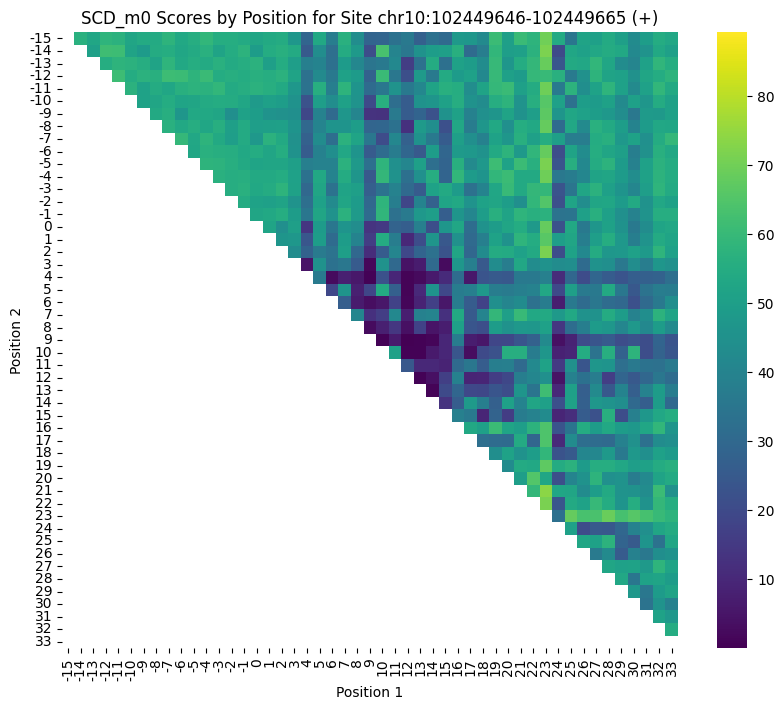

chr11 57467954 57467973 -


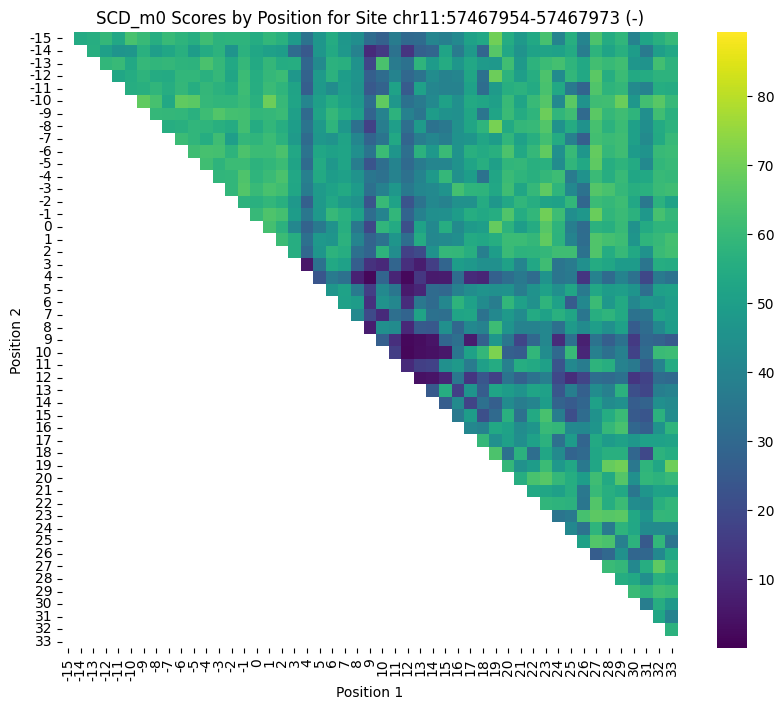

chr11 77100318 77100337 +


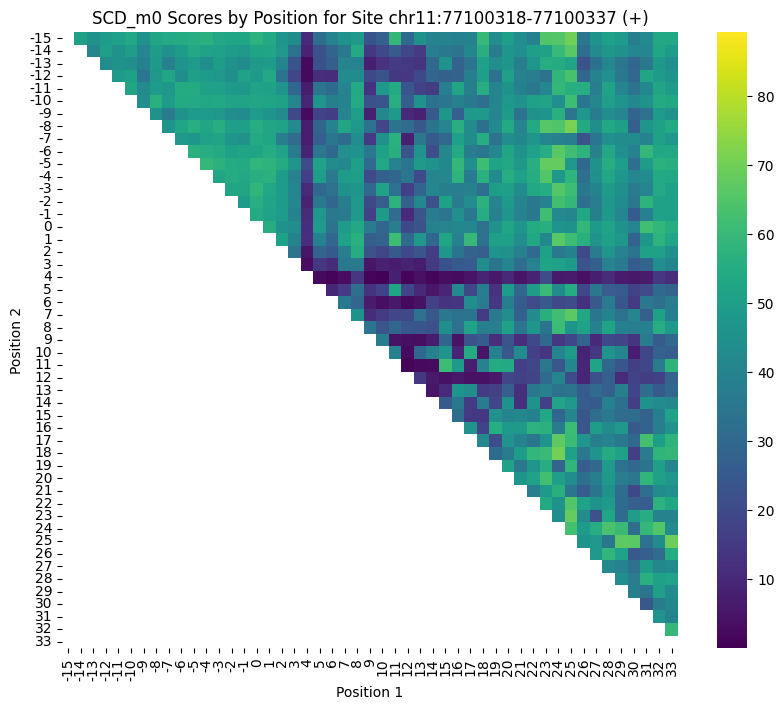

chr11 78838232 78838251 +


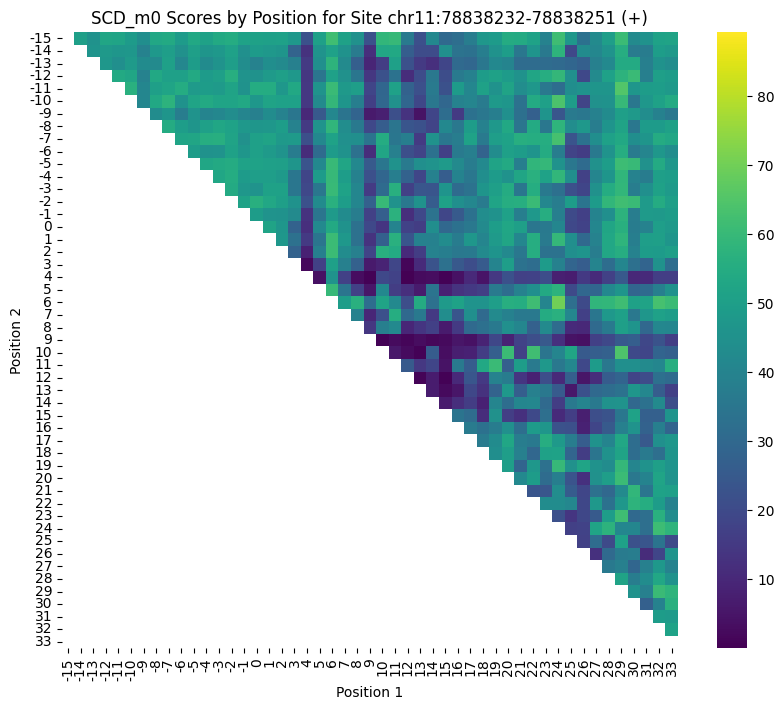

chr11 109860808 109860827 -


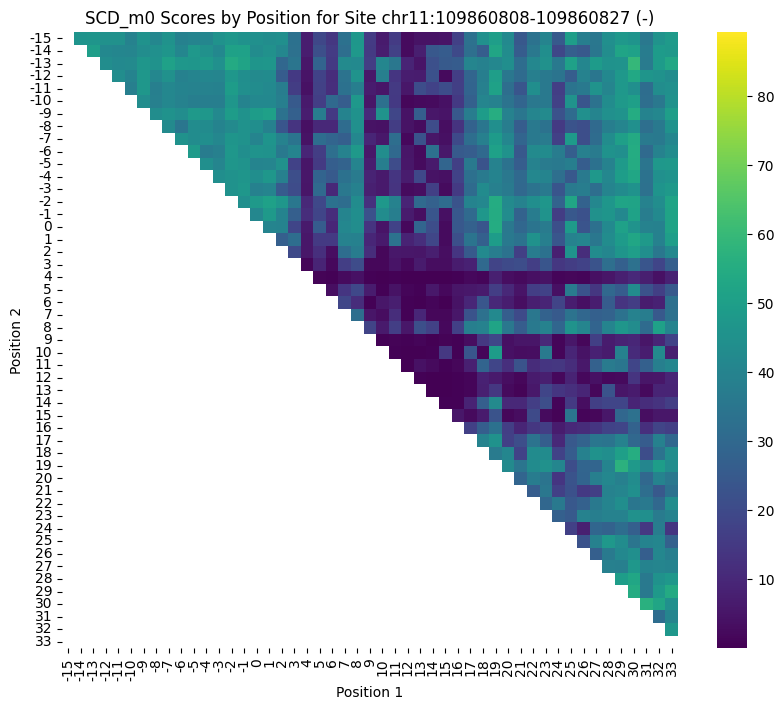

chr11 113165297 113165316 -


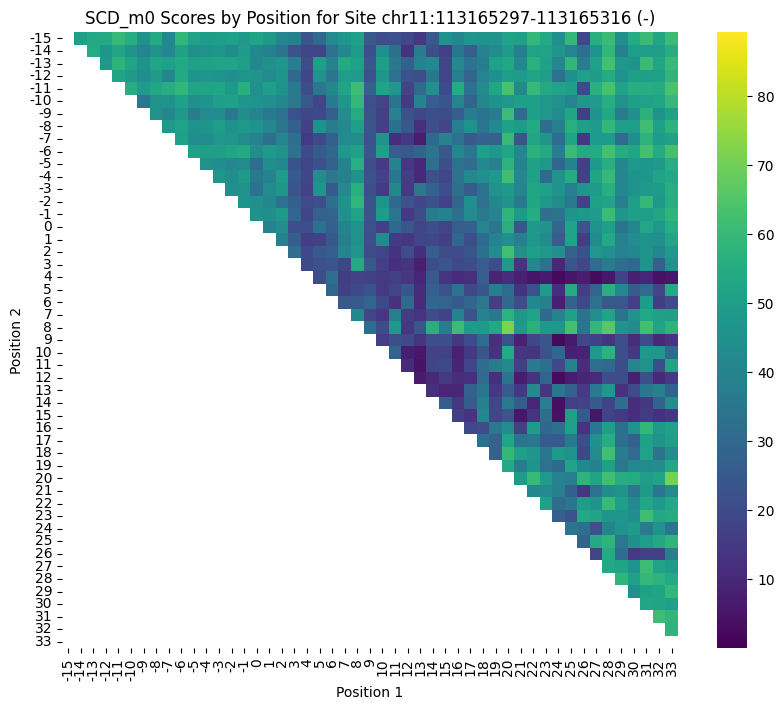

chr12 8306730 8306749 -


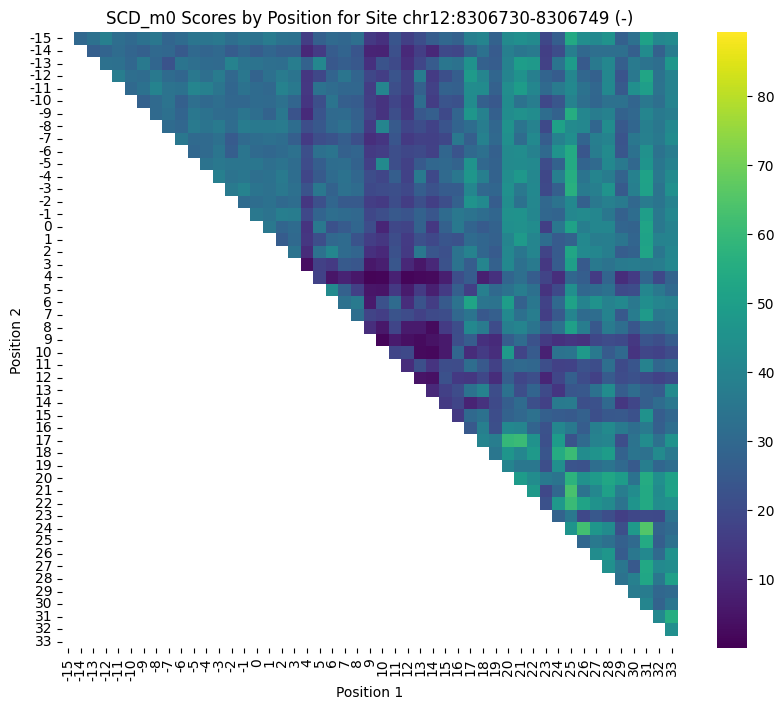

chr12 77000250 77000269 +


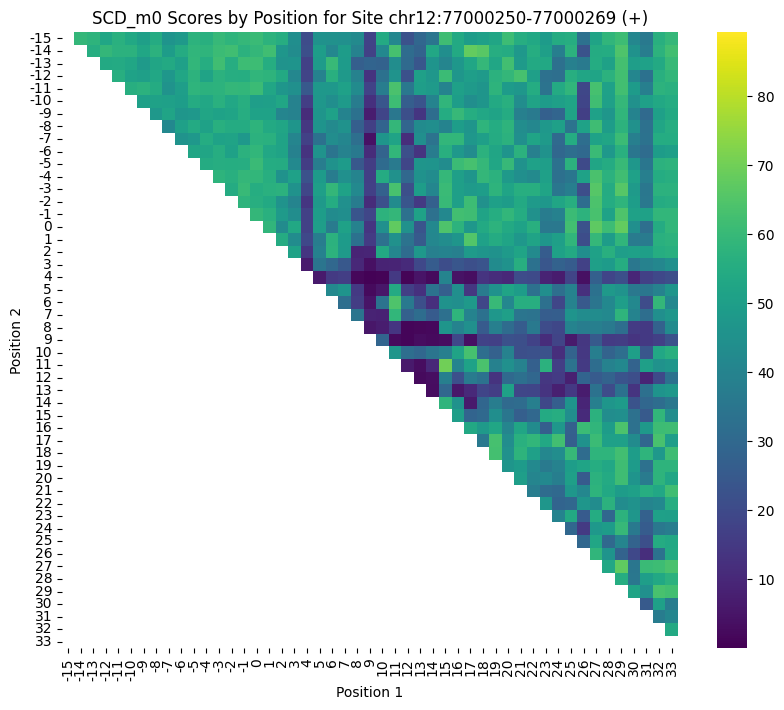

chr12 78056172 78056191 +


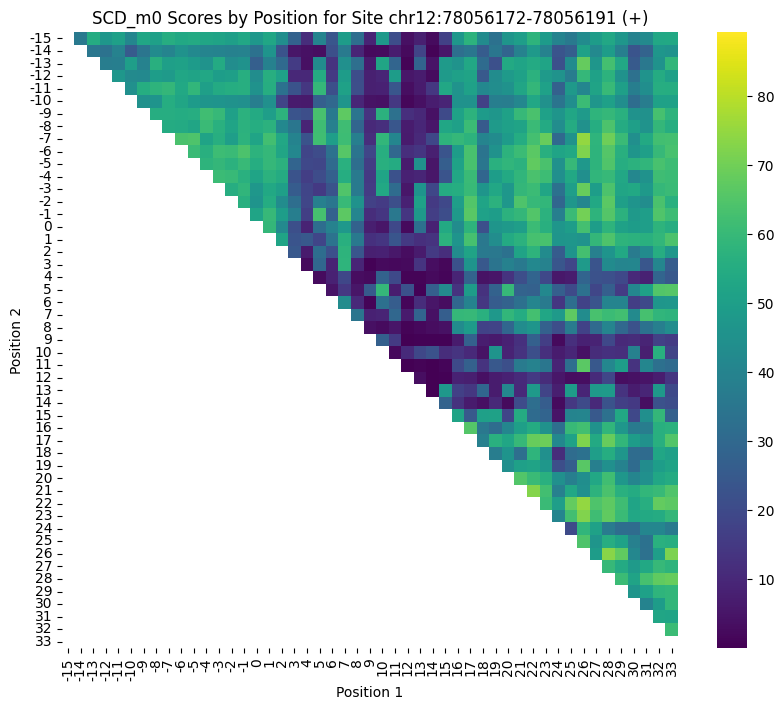

chr12 92303369 92303388 +


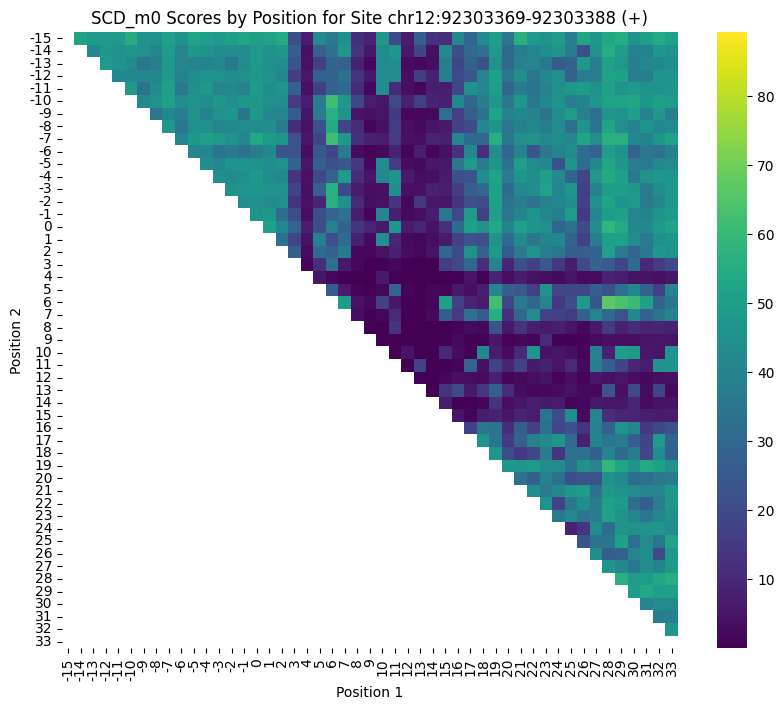

chr12 113216114 113216133 +


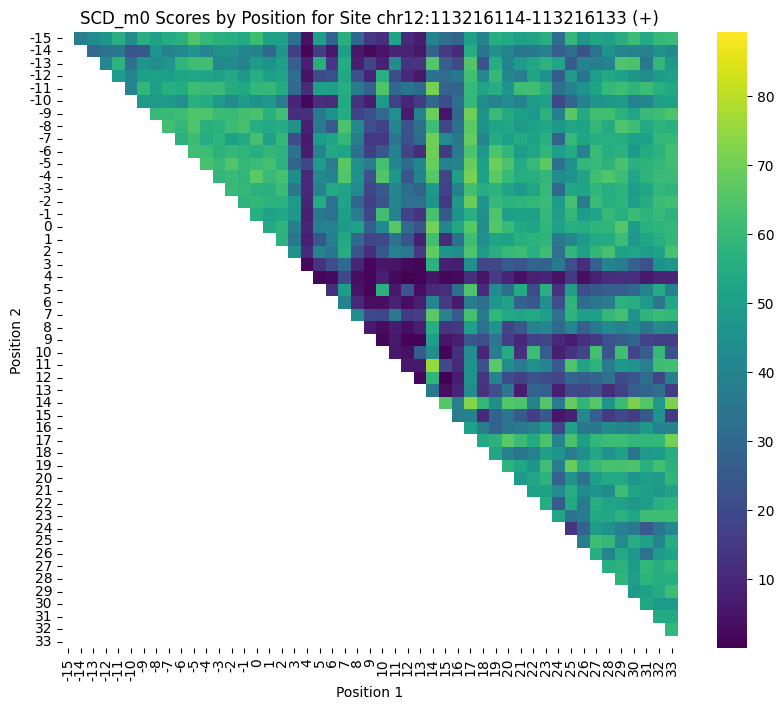

chr13 51830906 51830925 +


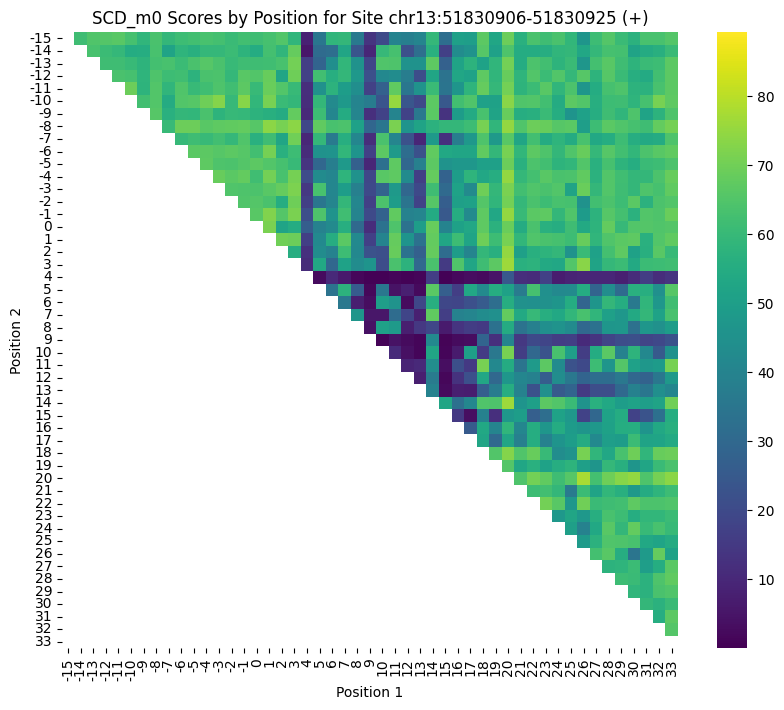

chr13 57260100 57260119 -


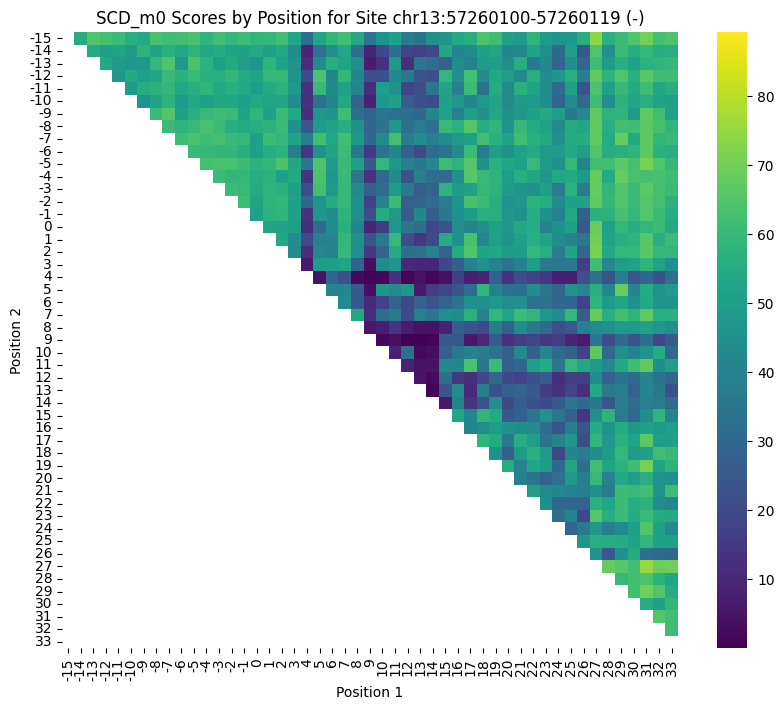

chr13 81439555 81439574 +


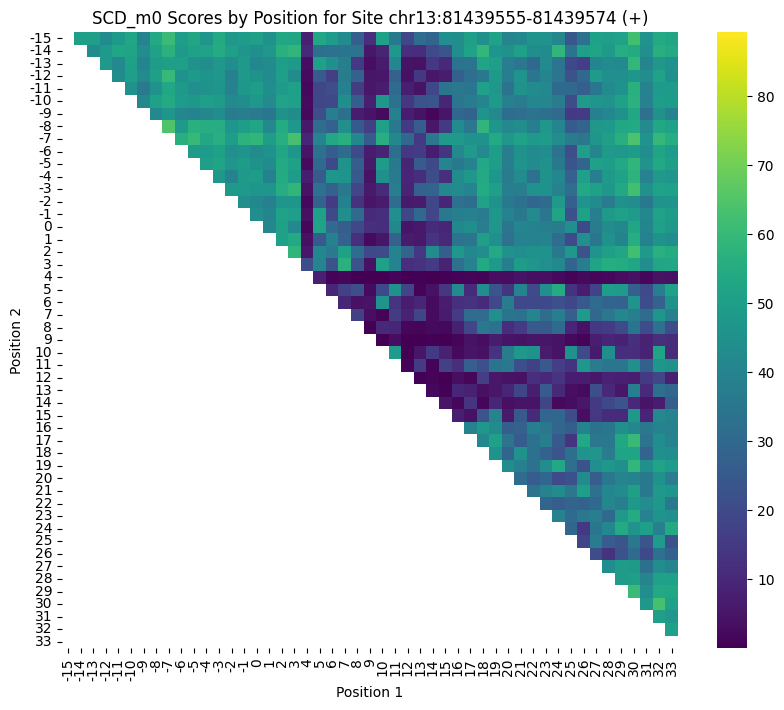

chr13 89543209 89543228 -


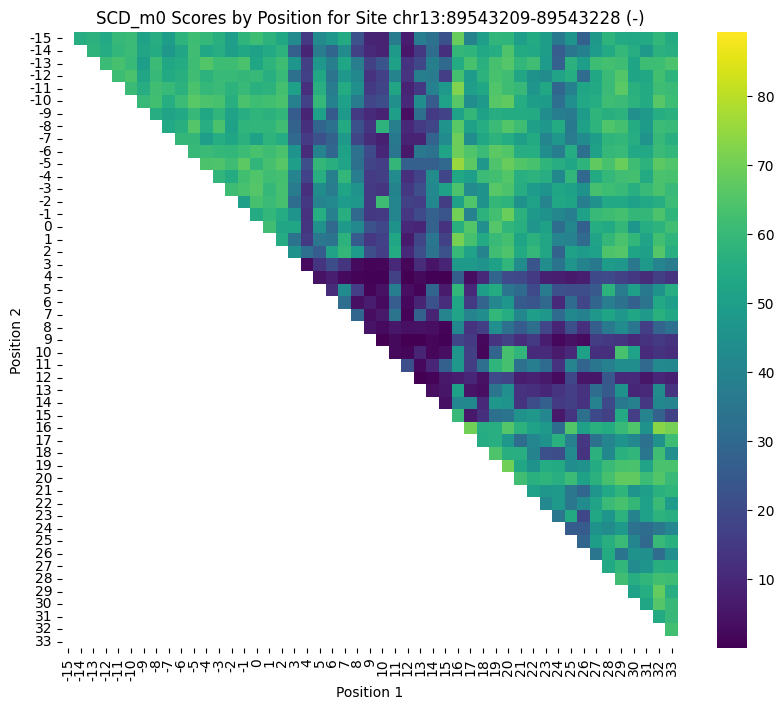

chr13 109213169 109213188 -


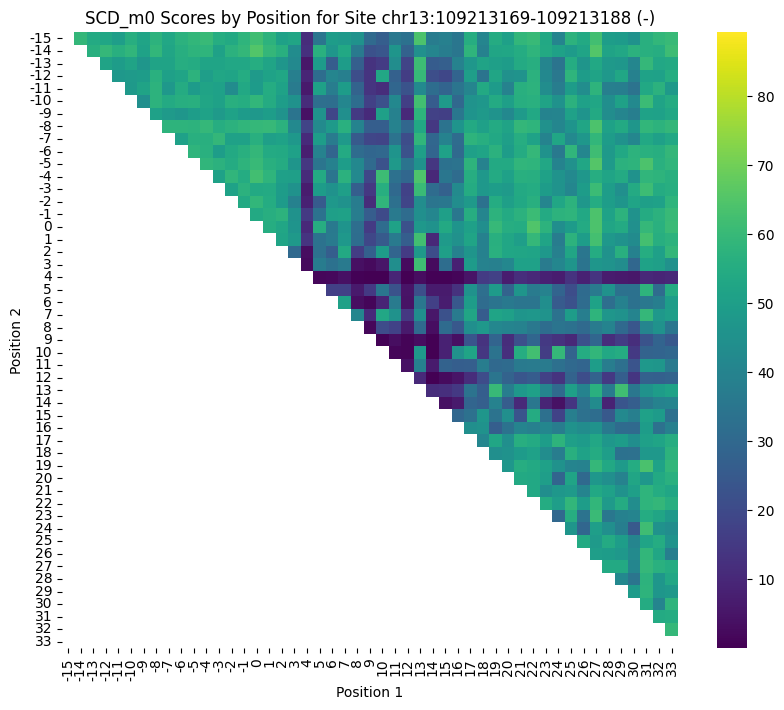

chr13 110382723 110382742 +


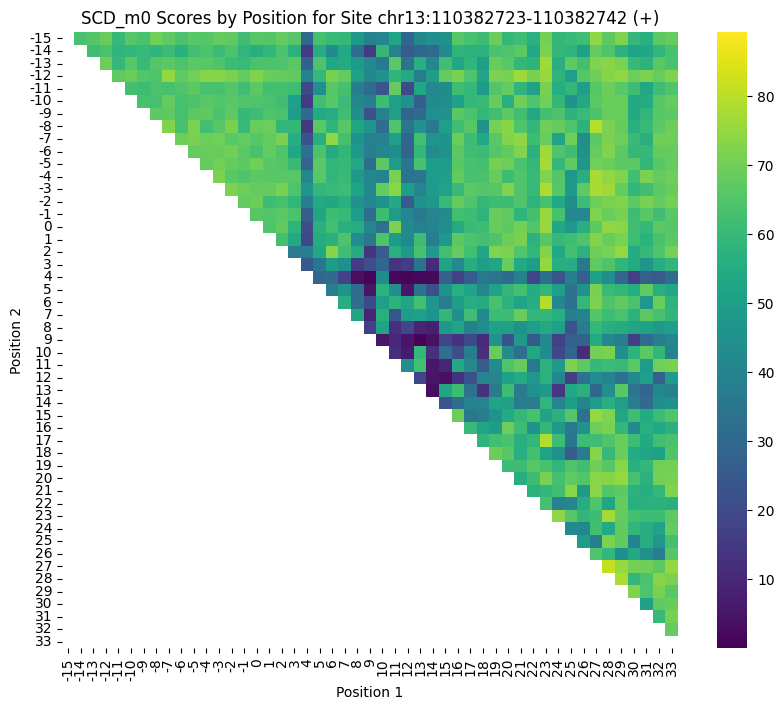

chr14 8356080 8356099 +


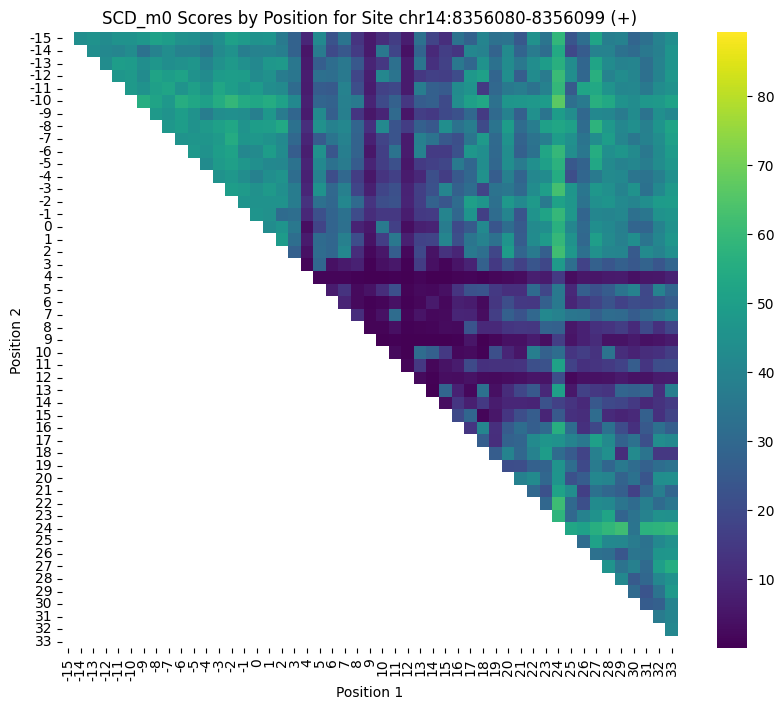

chr14 12140095 12140114 -


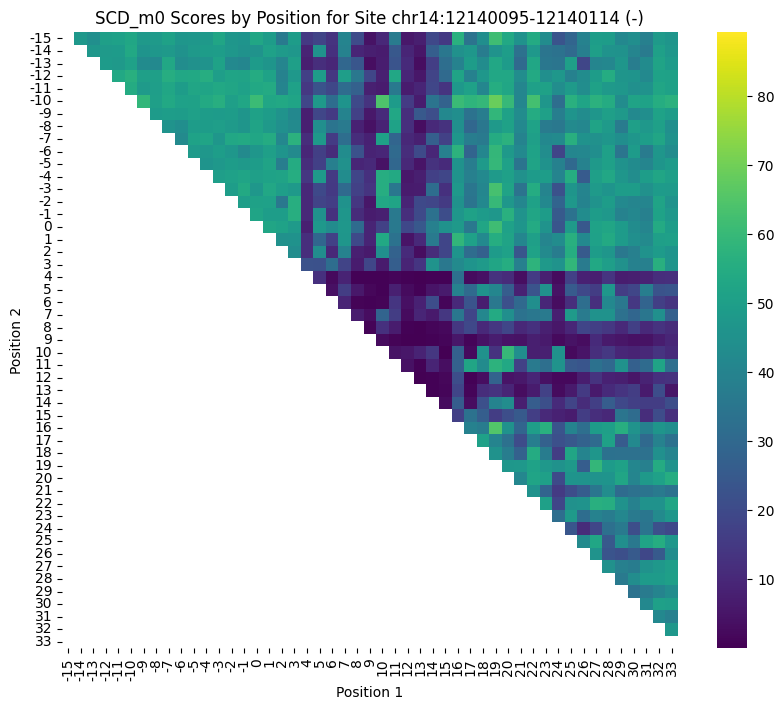

chr14 29110853 29110872 -


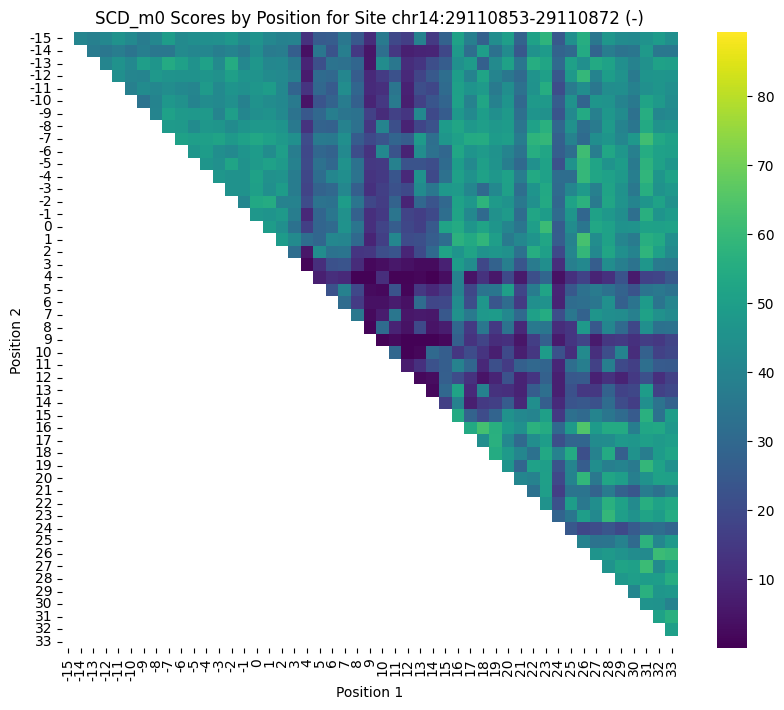

chr14 34810922 34810941 +


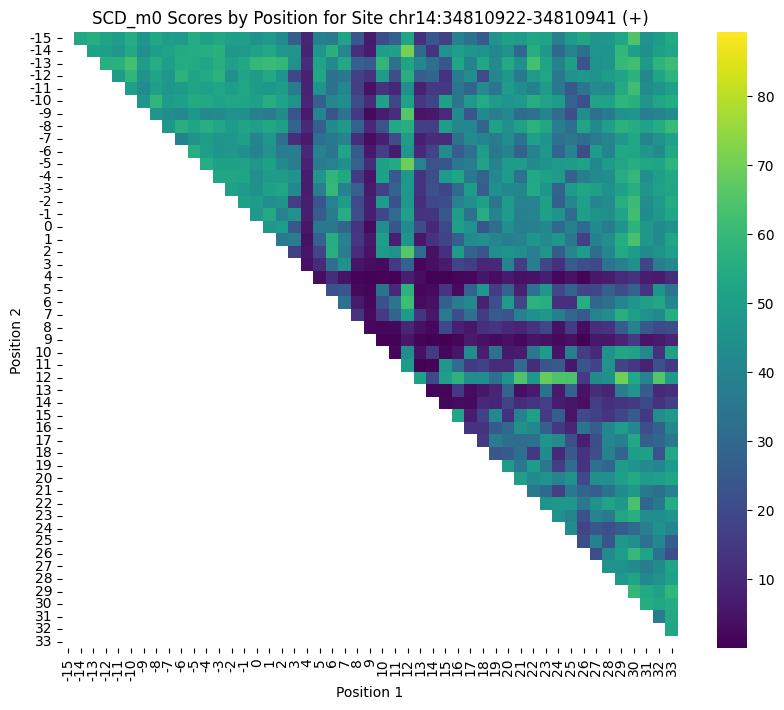

chr14 87452272 87452291 -


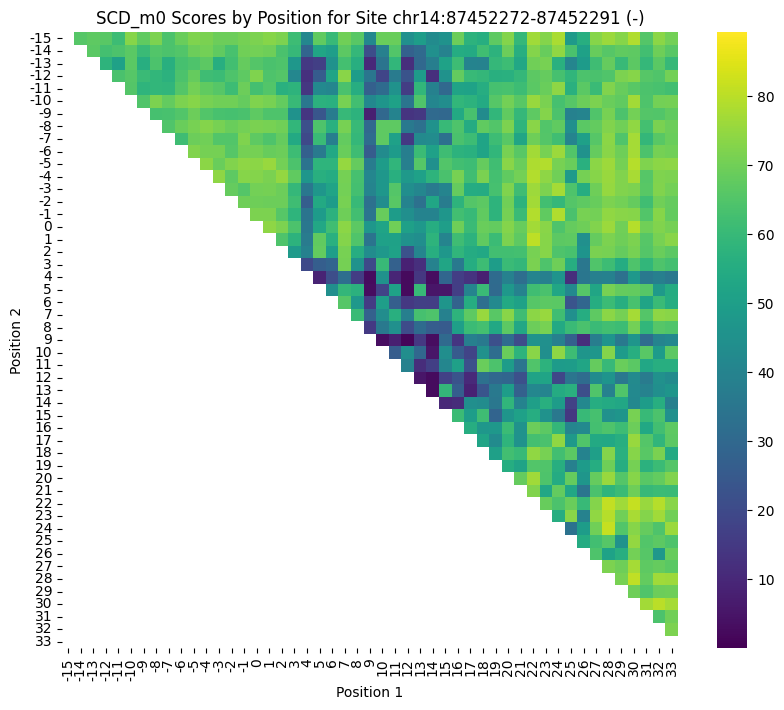

chr15 32766466 32766485 -


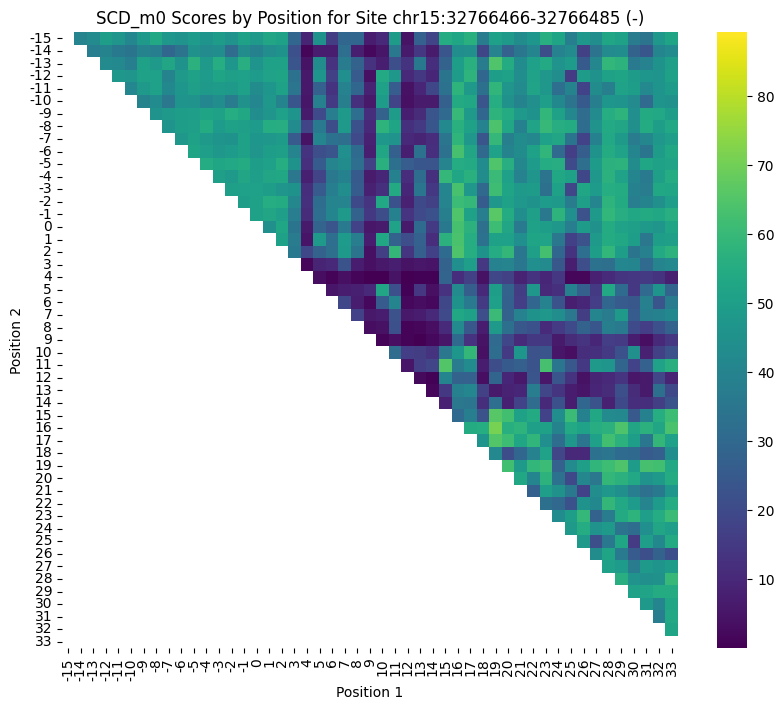

chr15 80704514 80704533 -


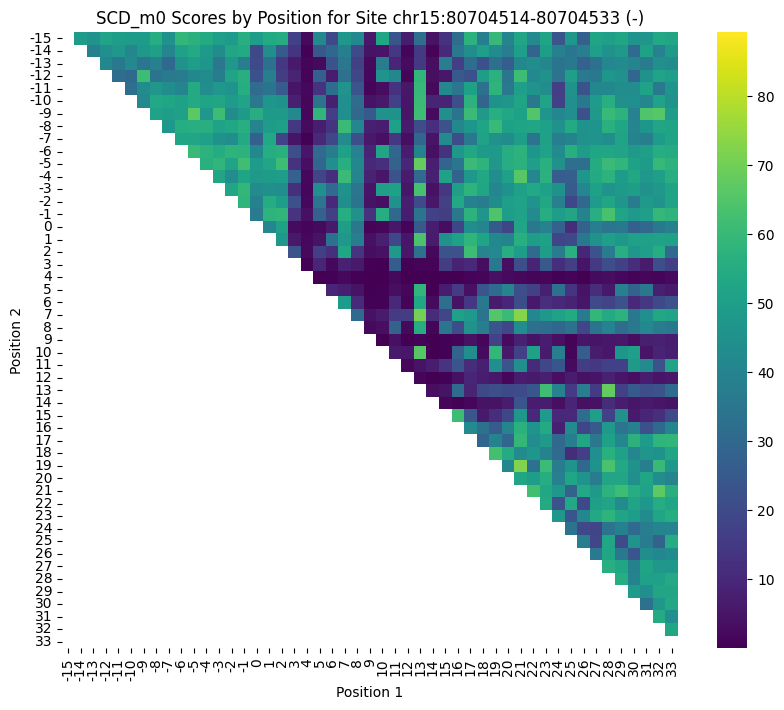

chr15 101984508 101984527 -


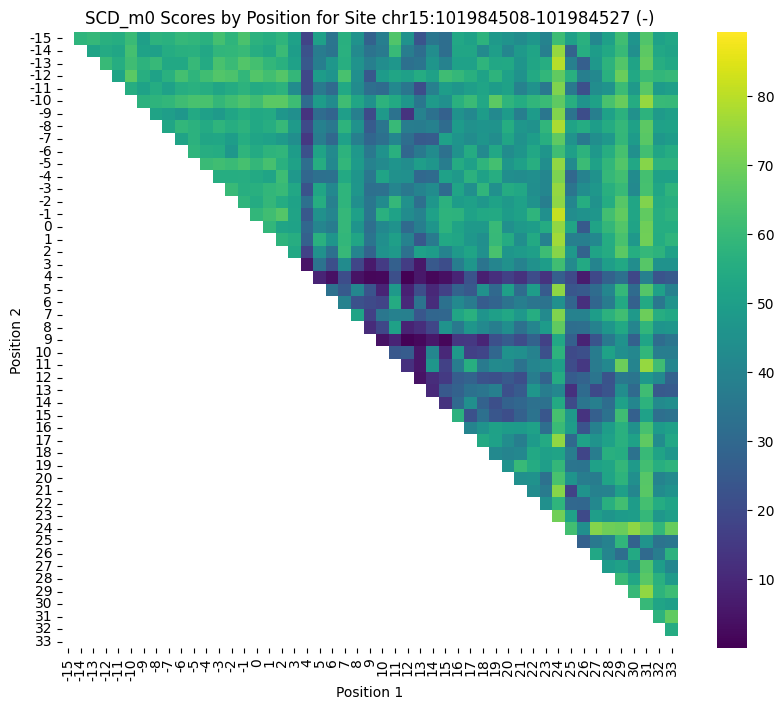

chr16 13117402 13117421 +


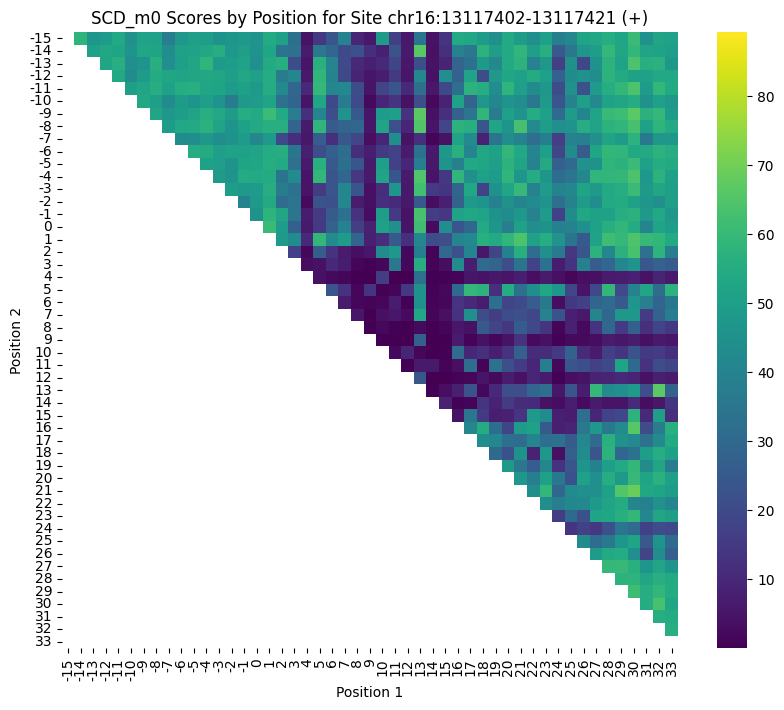

chr16 22564764 22564783 +


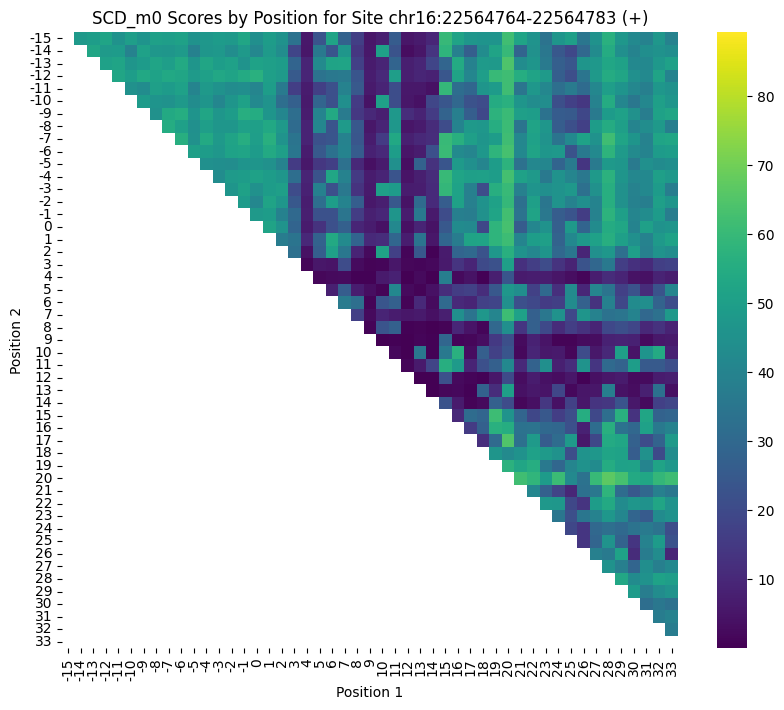

chr16 41244916 41244935 -


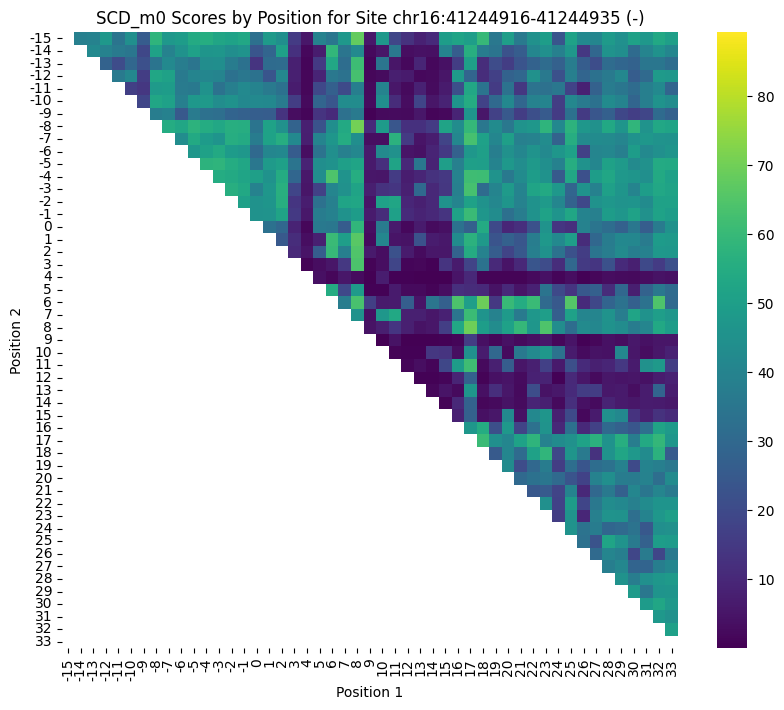

chr16 55477007 55477026 -


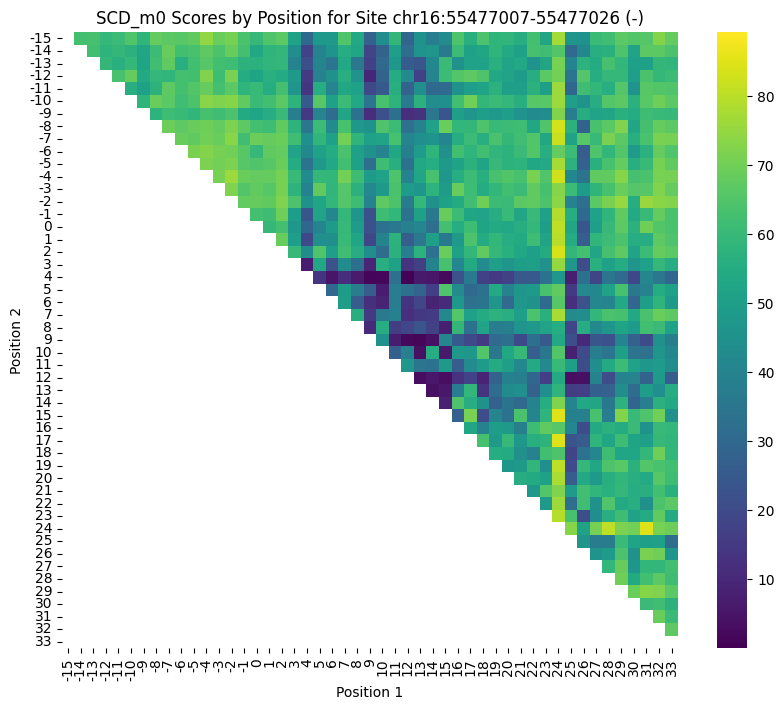

chr16 64748436 64748455 -


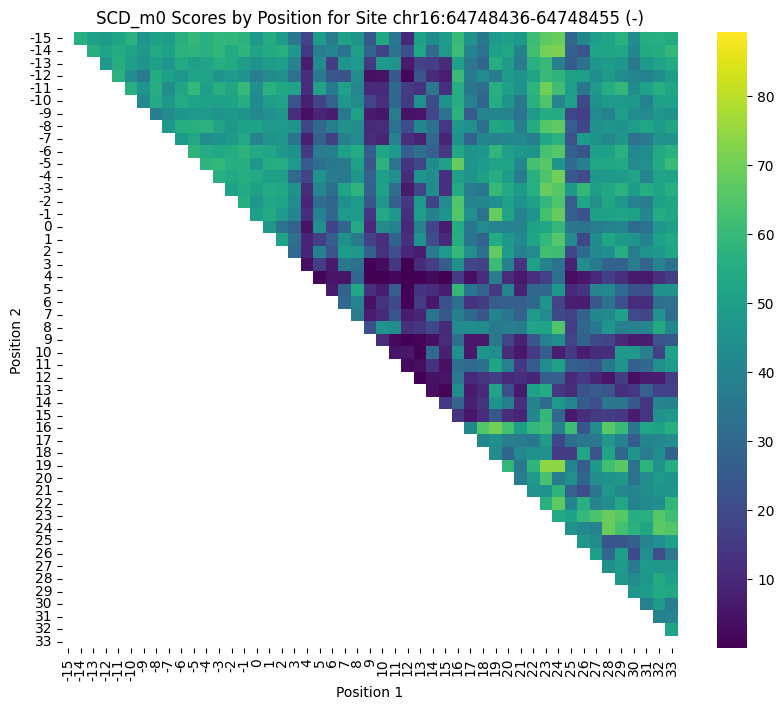

chr16 72218208 72218227 +


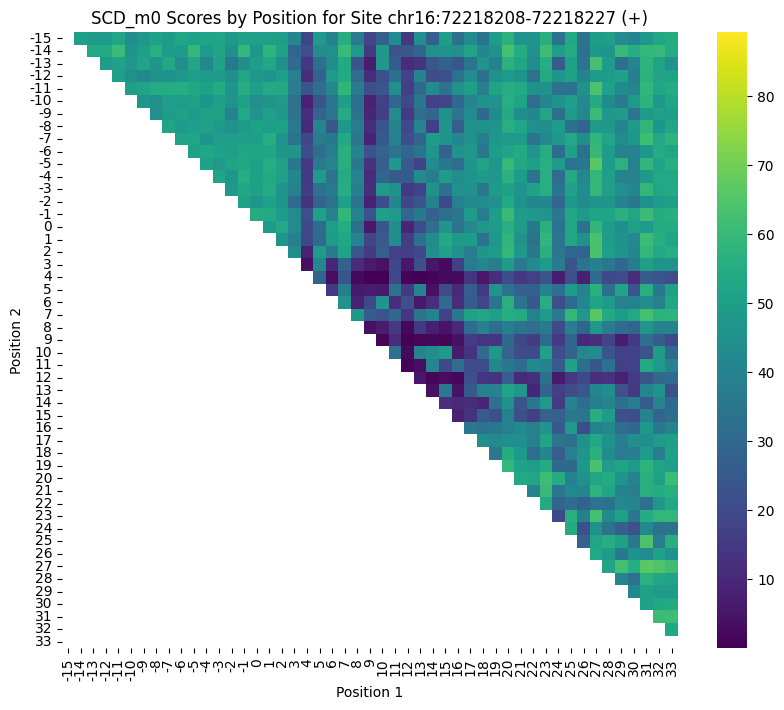

chr16 72980048 72980067 -


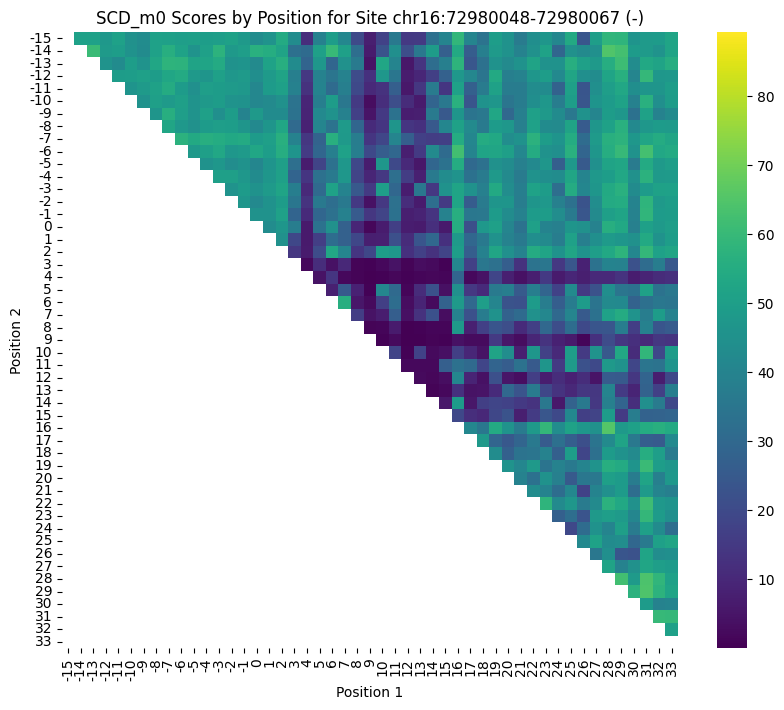

chr16 89765679 89765698 -


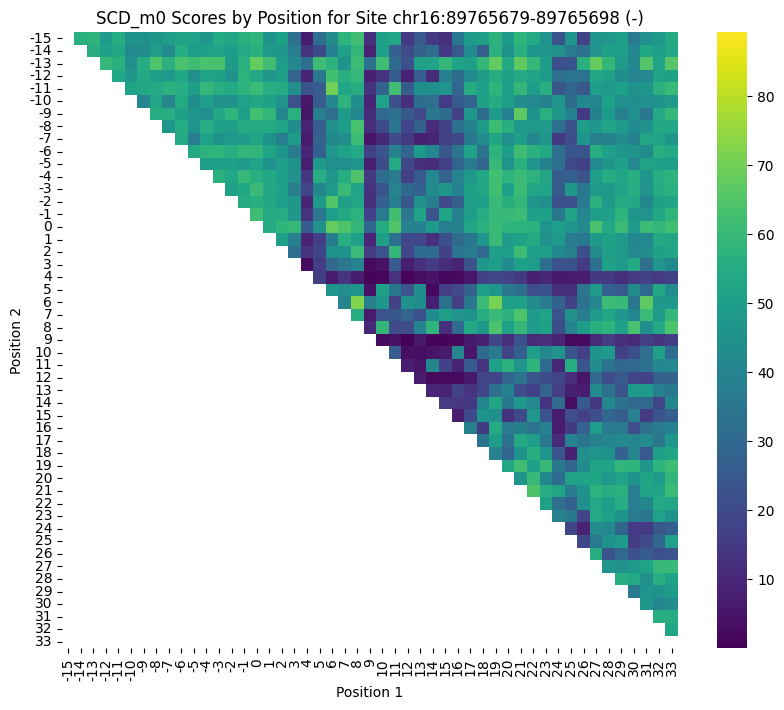

chr17 73303410 73303429 +


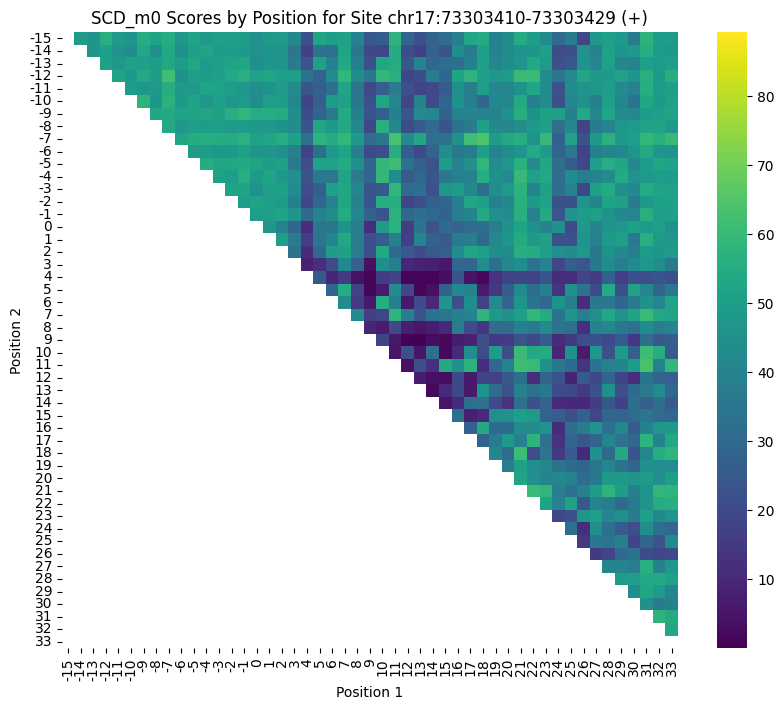

chr17 86906315 86906334 -


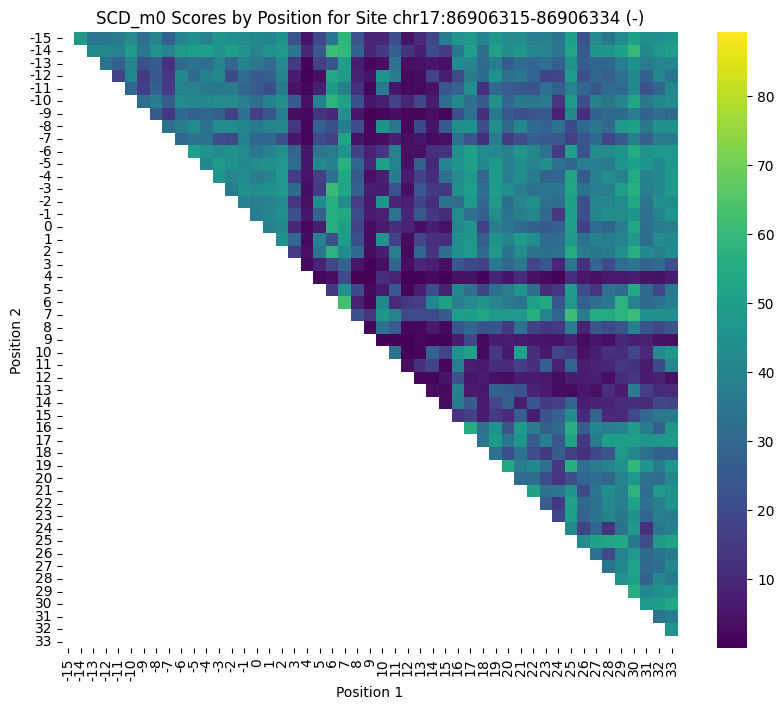

chr18 33790239 33790258 -


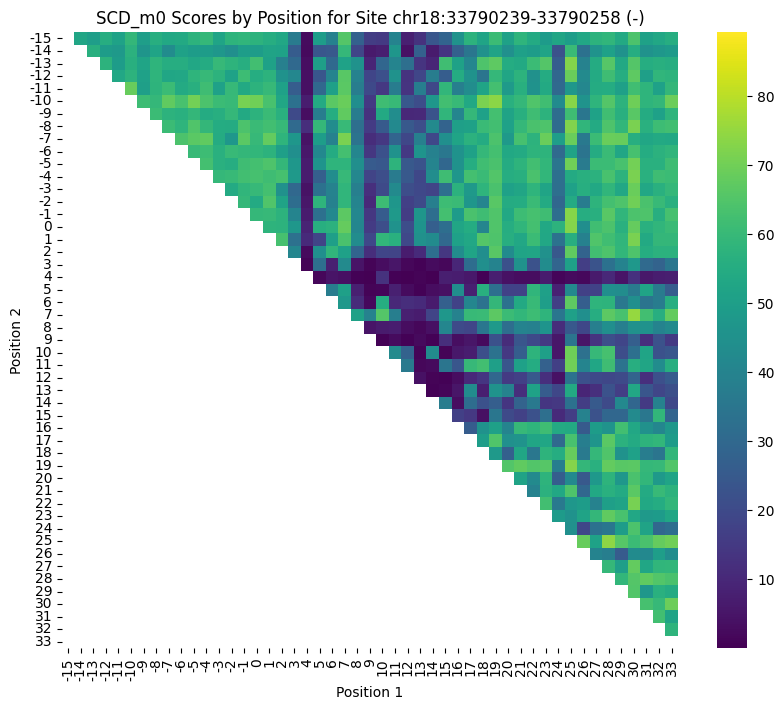

chr18 75606680 75606699 +


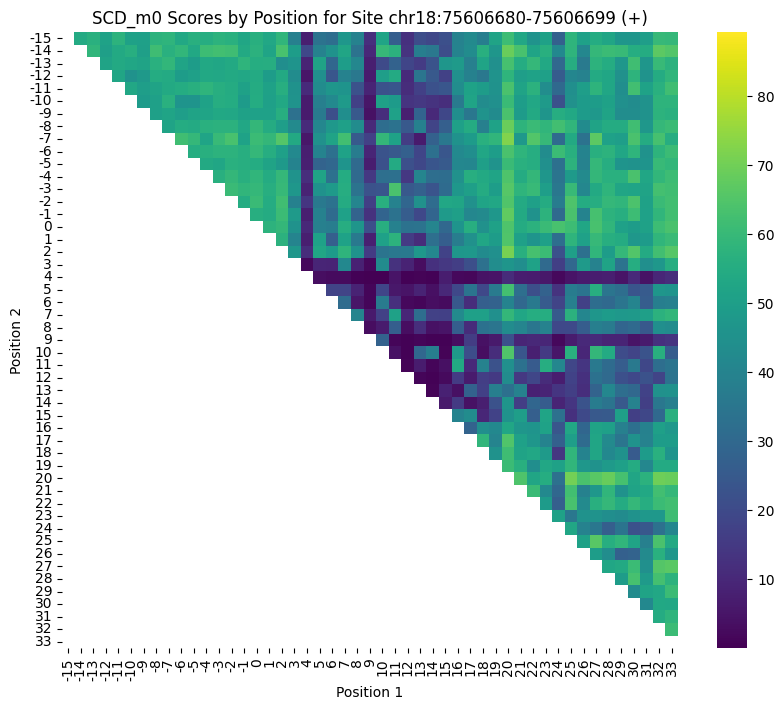

chr19 20345139 20345158 -


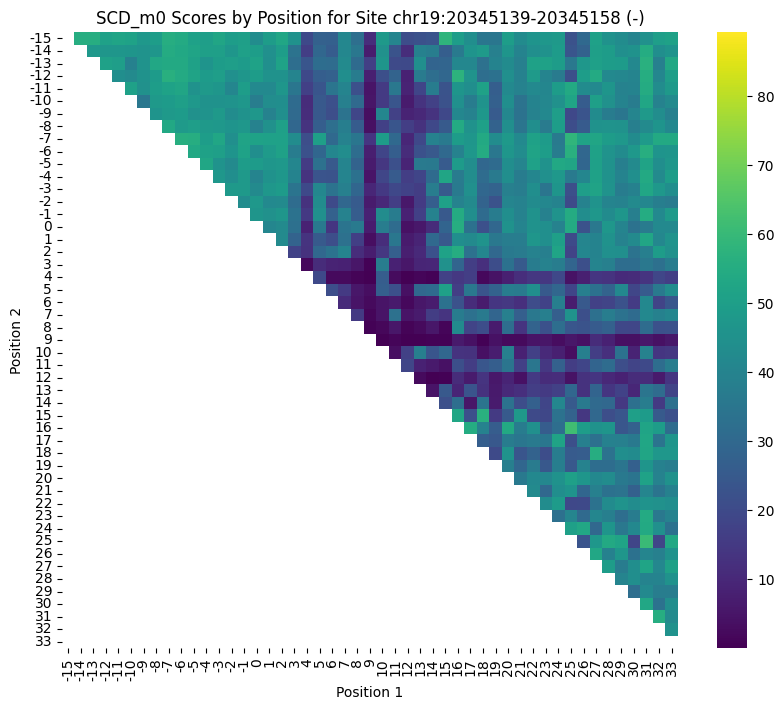

chr19 20345718 20345737 +


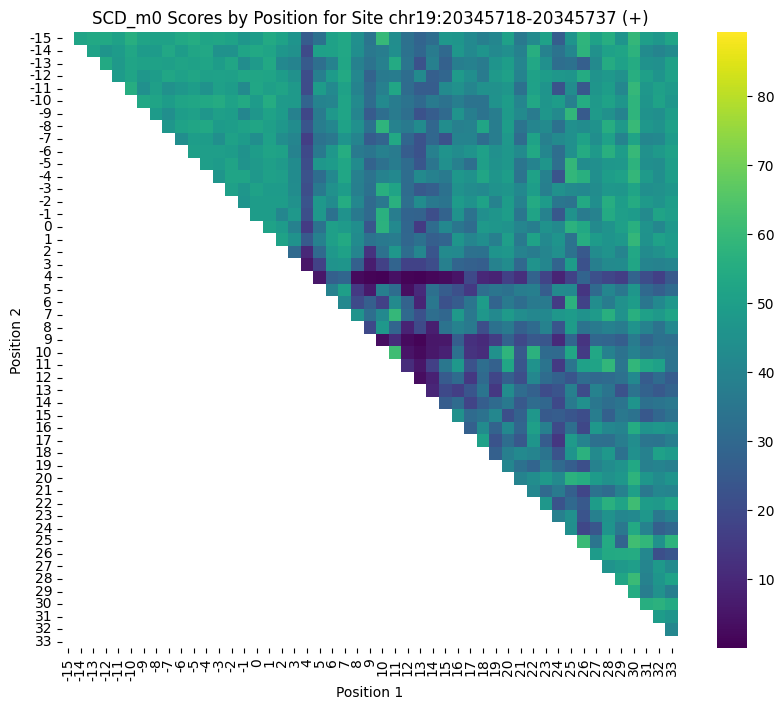

chr2 13278190 13278209 +


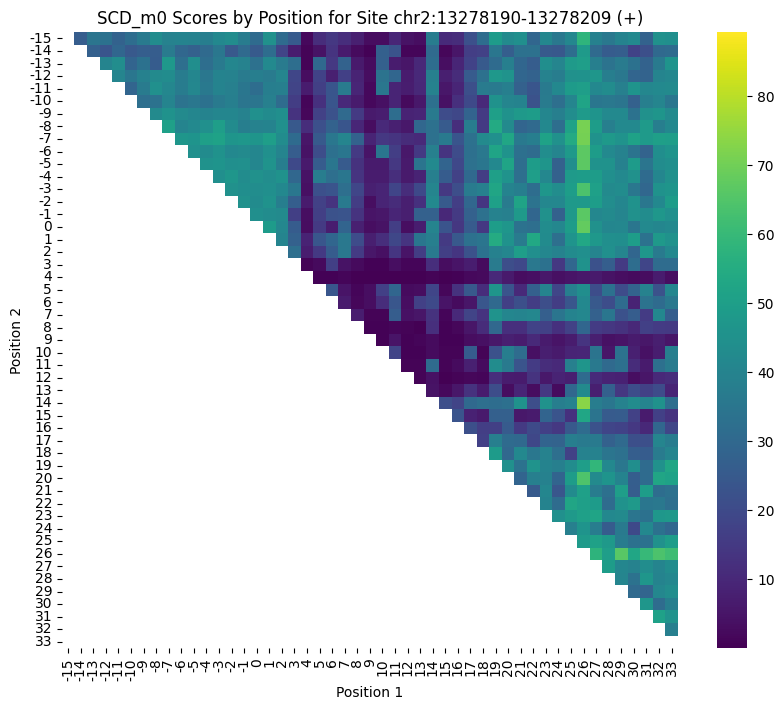

chr2 27770359 27770378 +


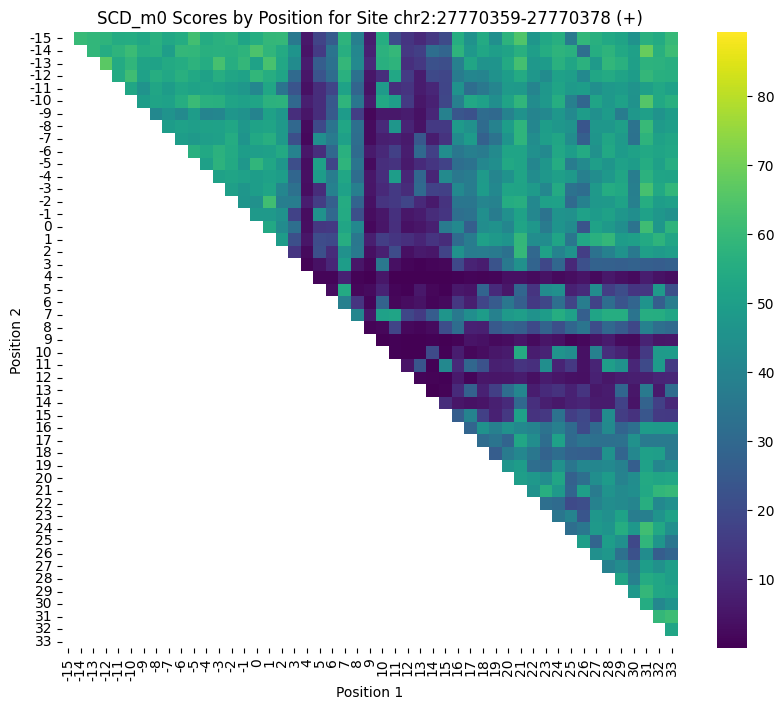

chr2 73550987 73551006 +


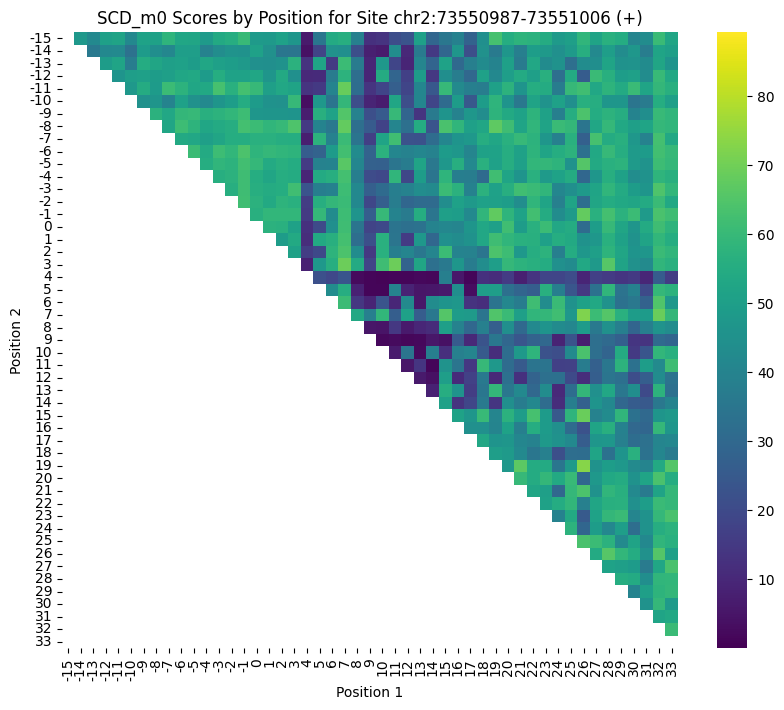

chr2 93199043 93199062 -


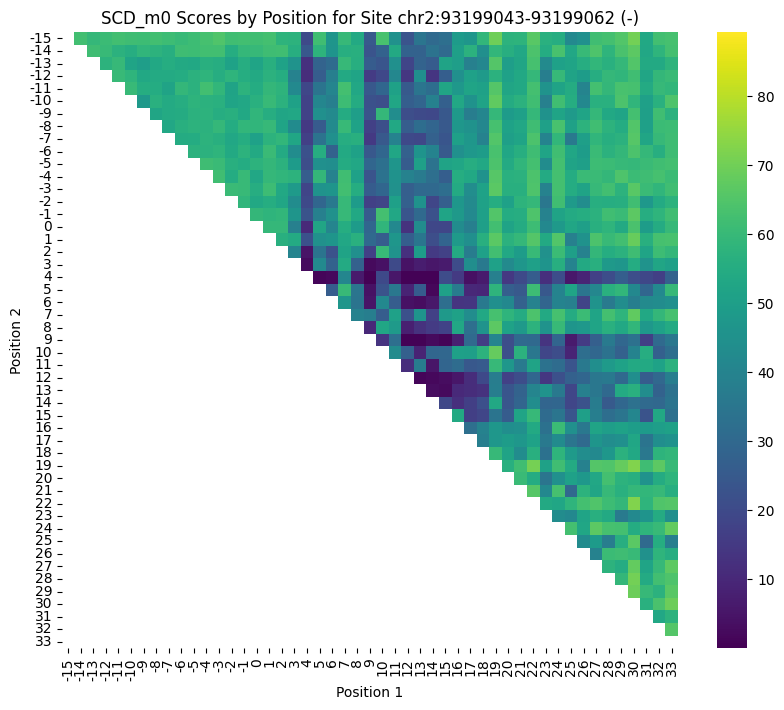

chr2 118638274 118638293 +


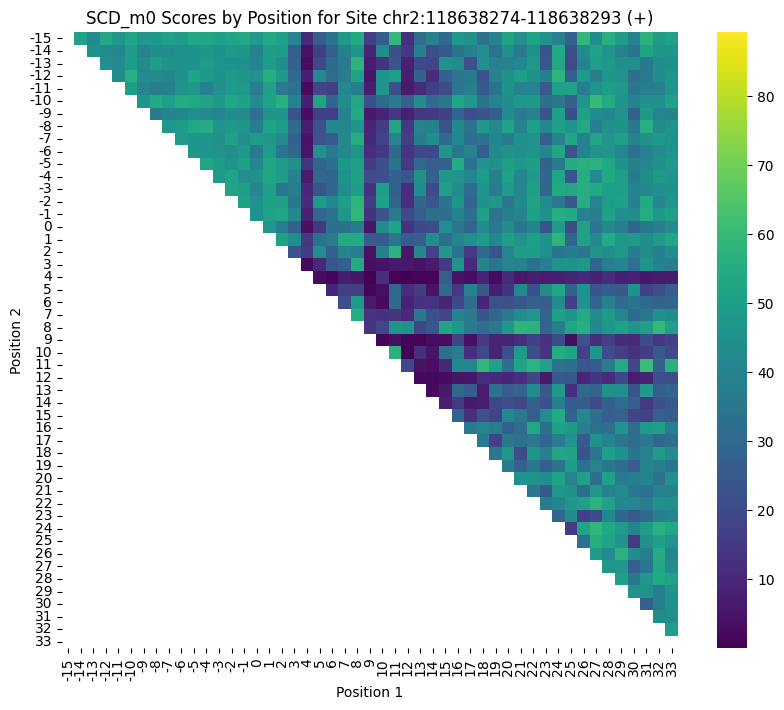

chr2 155811901 155811920 -


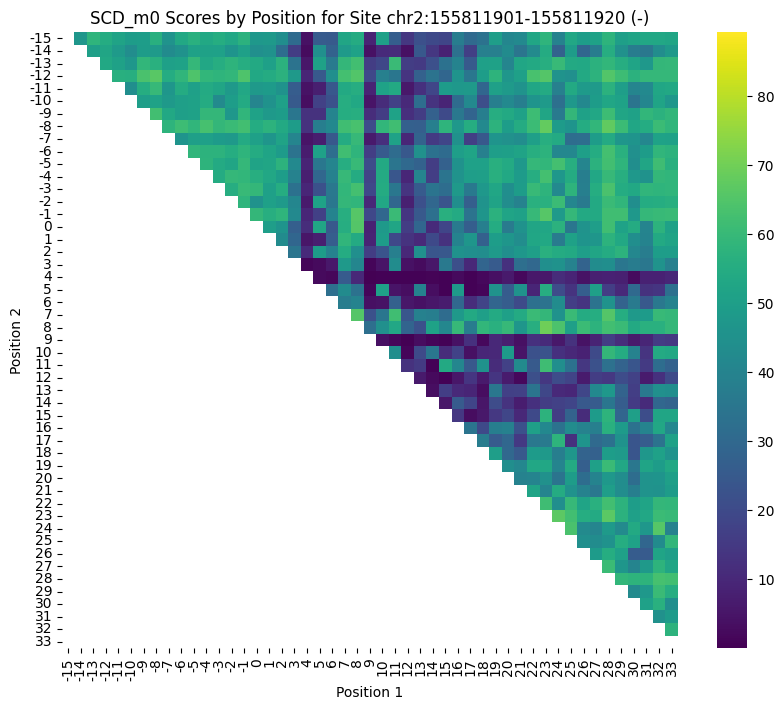

chr2 160598019 160598038 +


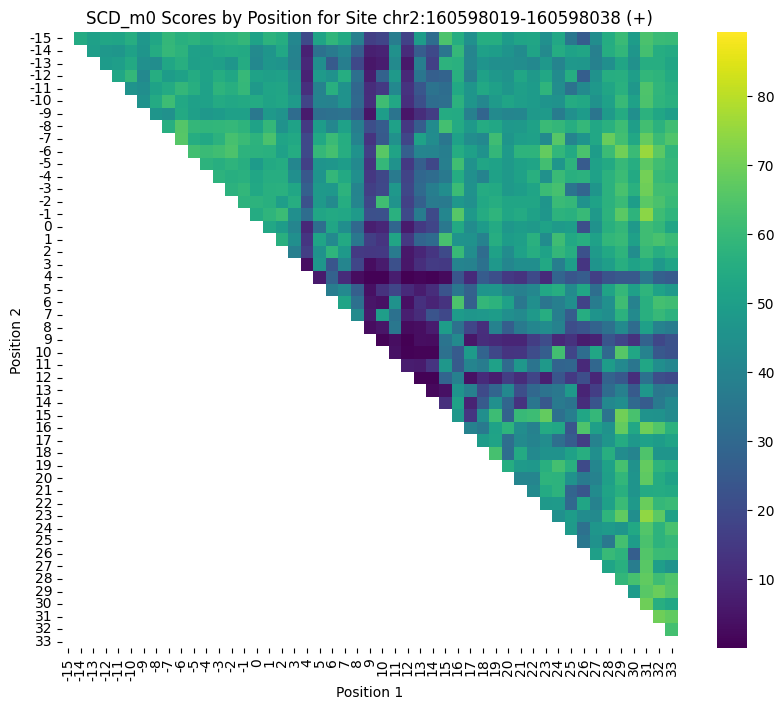

chr2 172216028 172216047 -


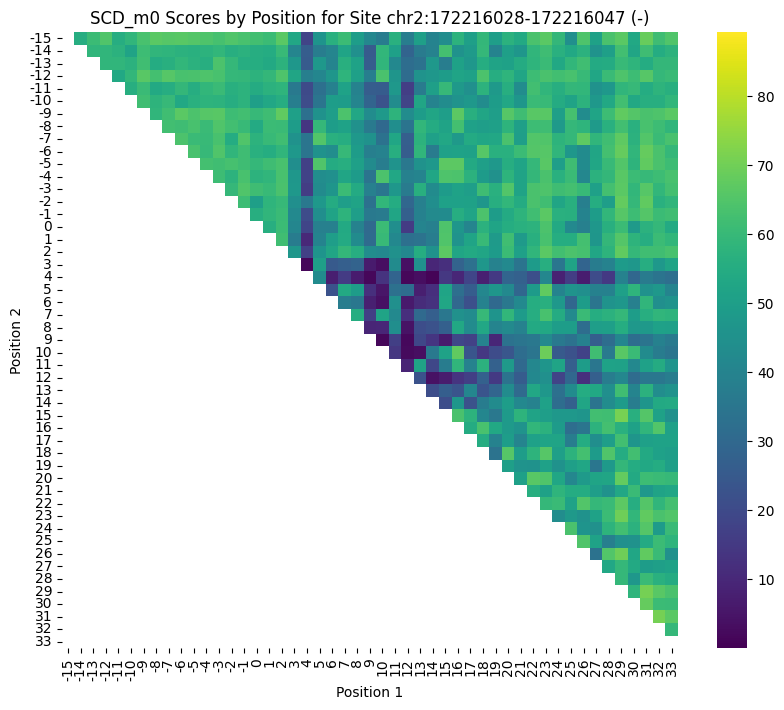

chr3 22309169 22309188 +


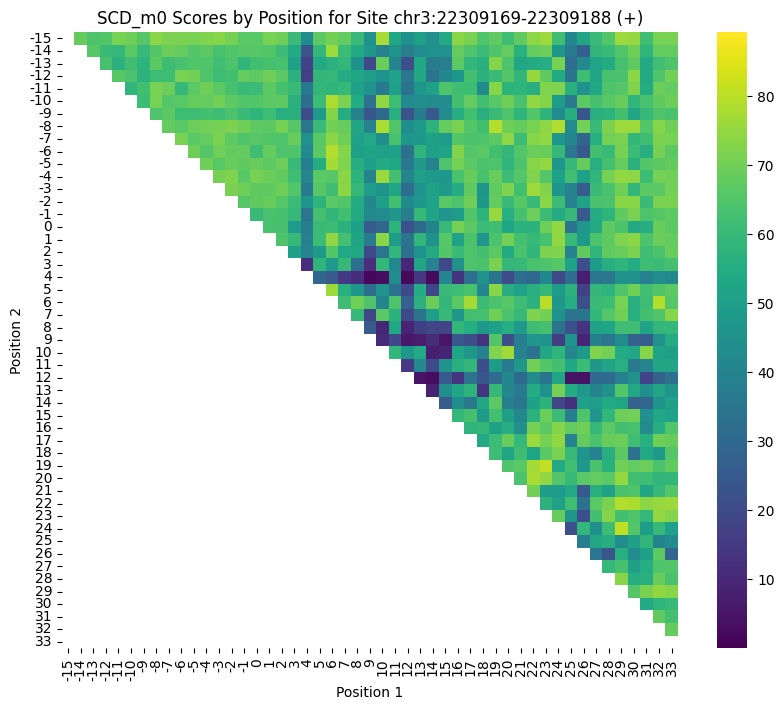

chr3 50906150 50906169 -


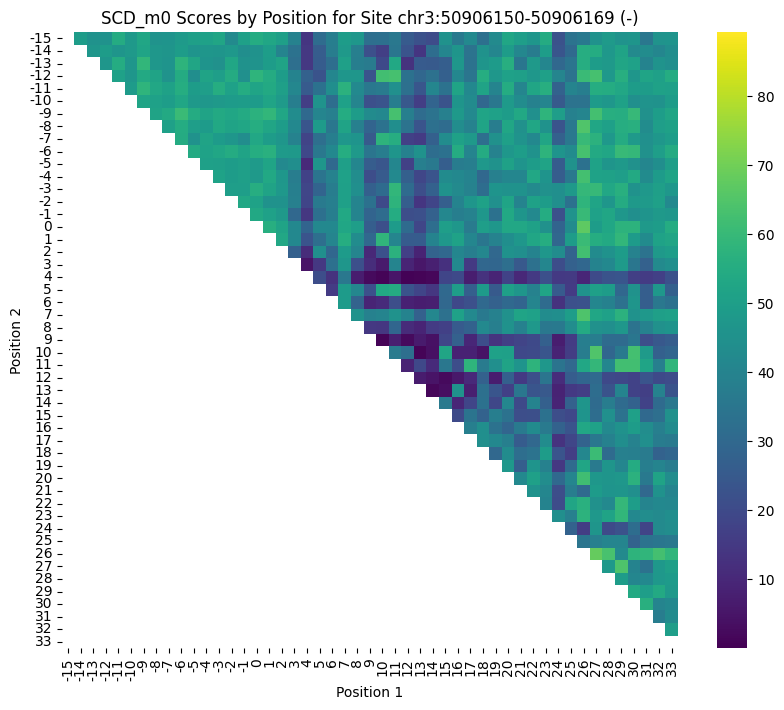

chr3 113080921 113080940 -


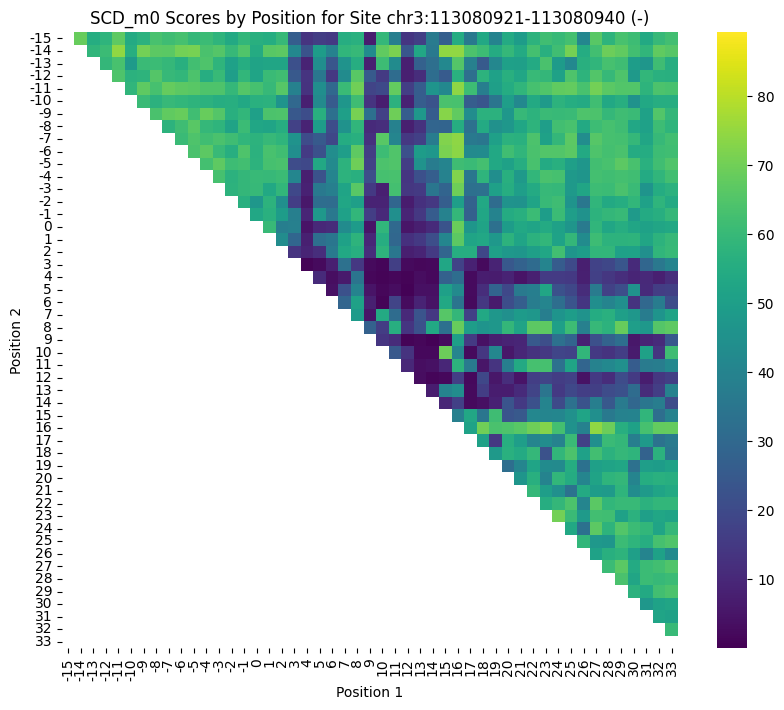

chr3 146185118 146185137 +


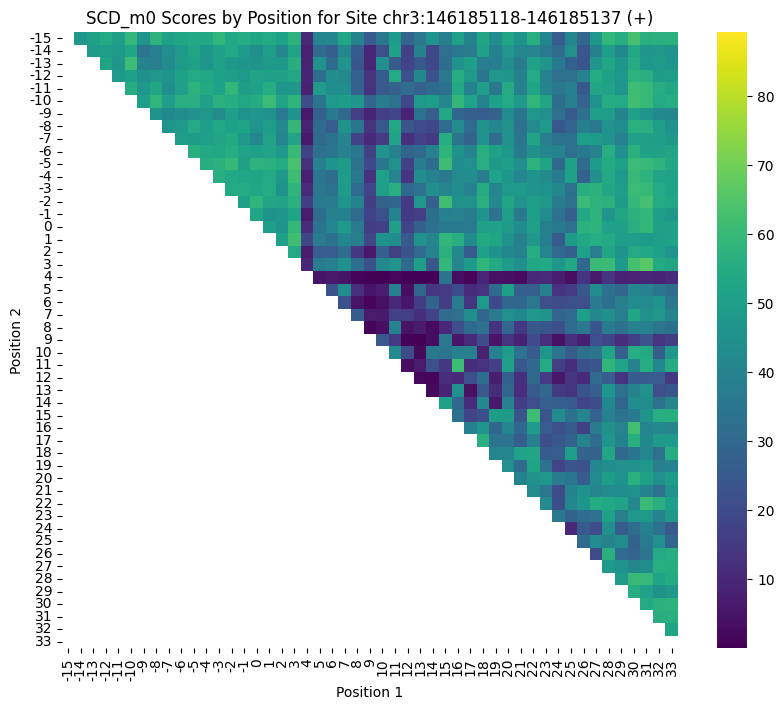

chr3 153655299 153655318 -


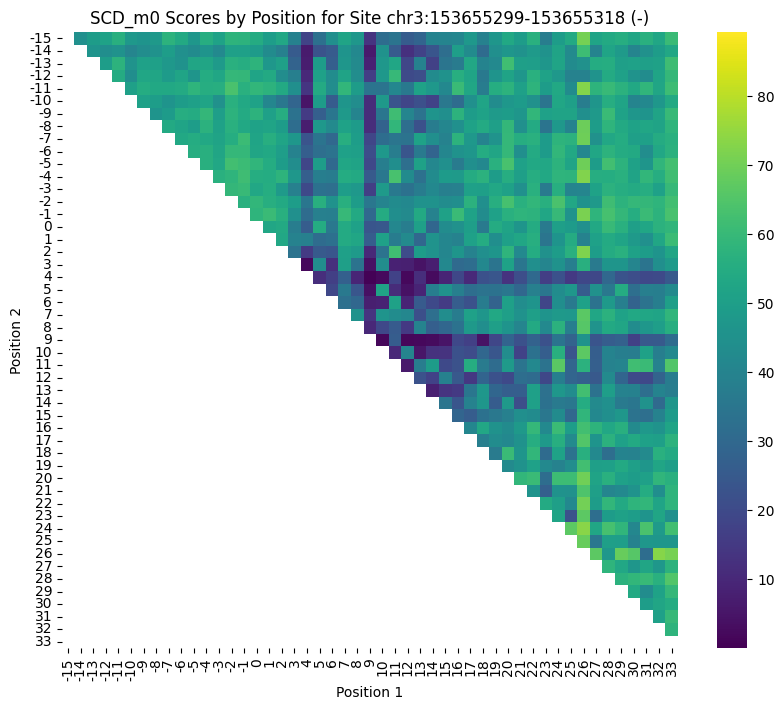

chr4 63368767 63368786 +


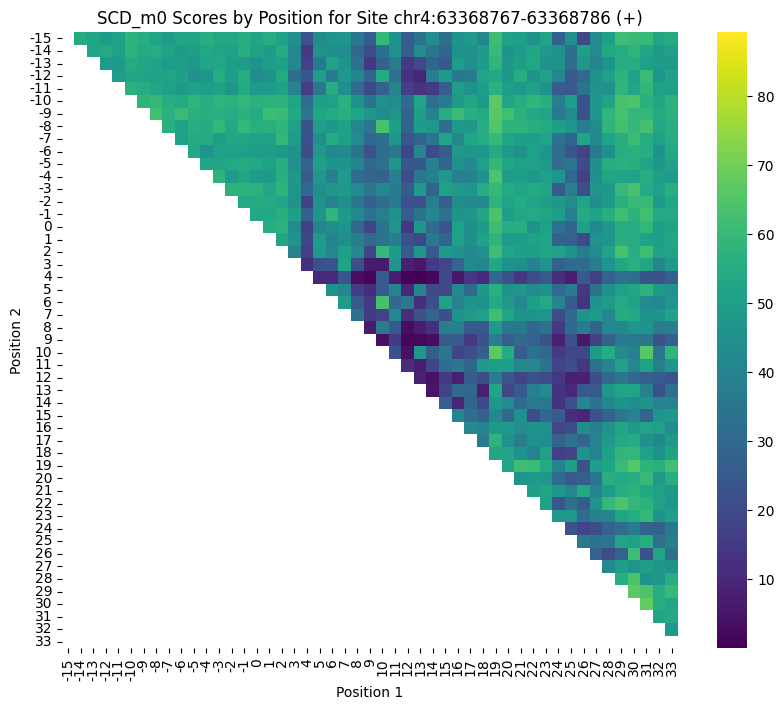

chr4 70621534 70621553 -


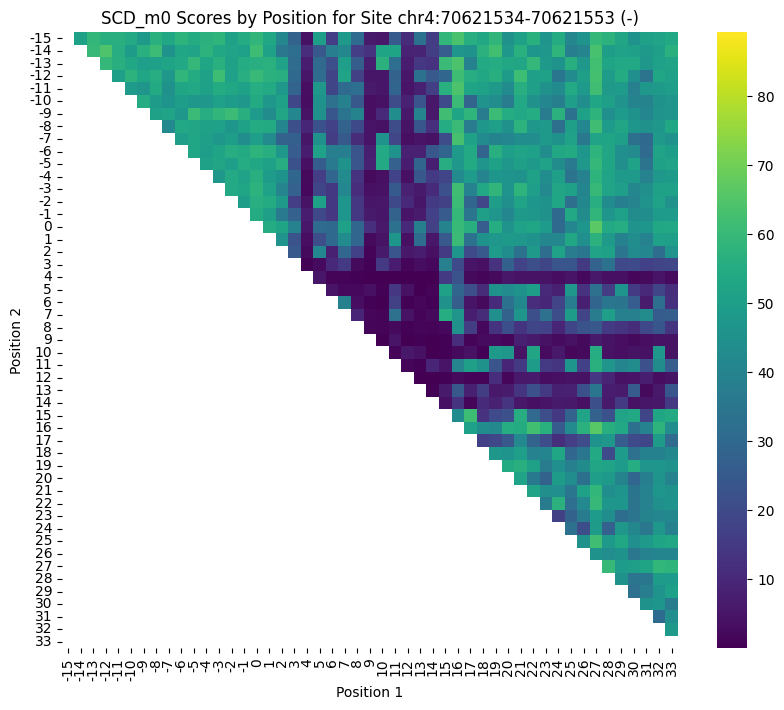

chr4 81178870 81178889 +


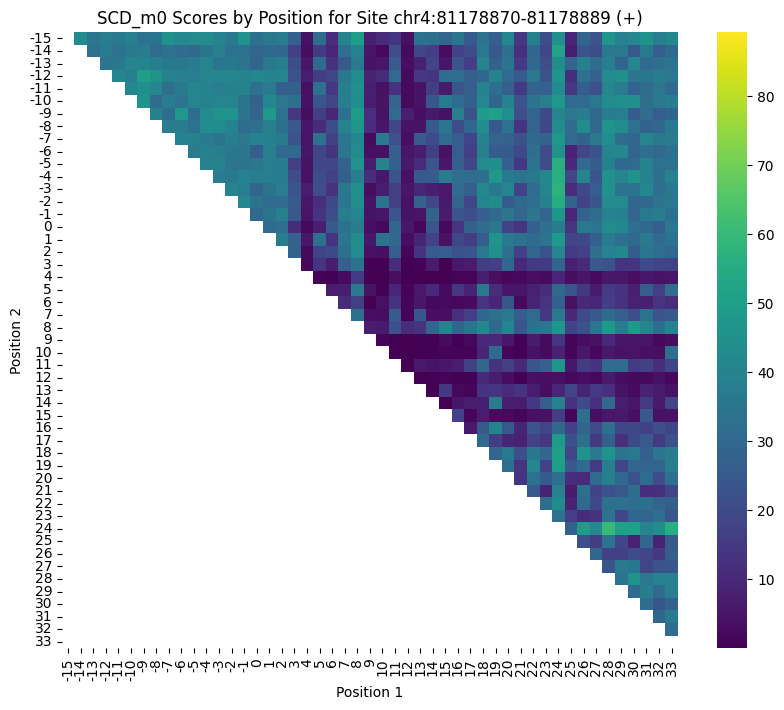

chr4 83596673 83596692 -


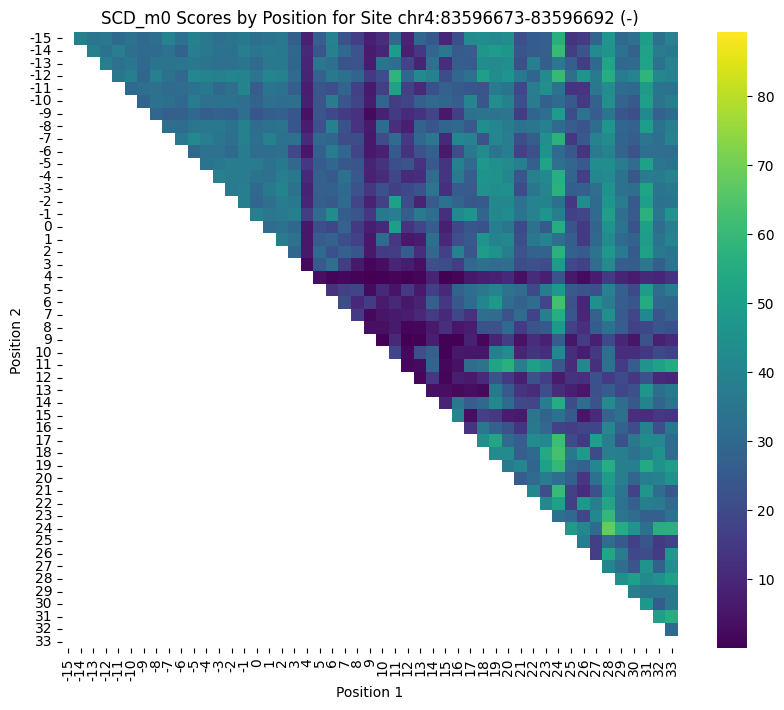

chr4 87368249 87368268 +


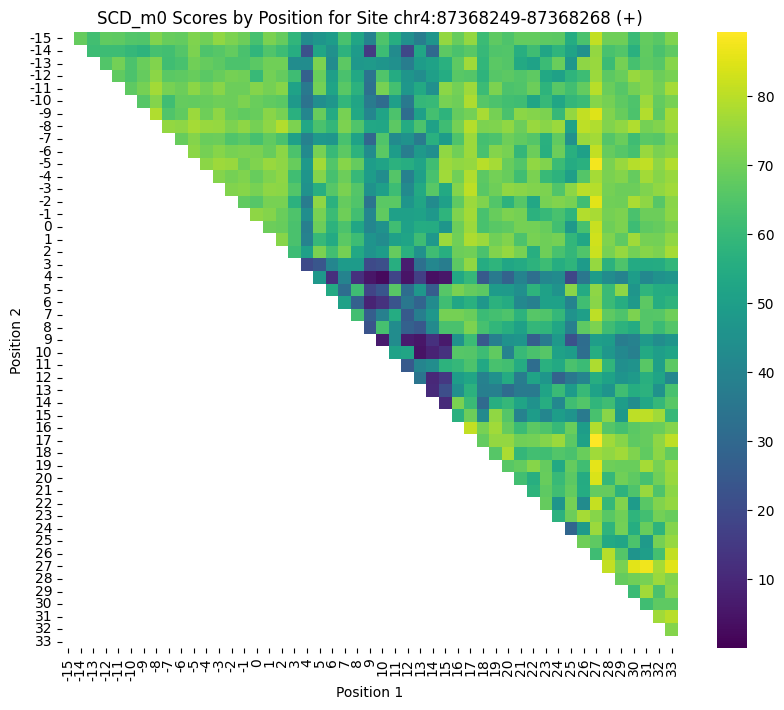

chr4 109729472 109729491 -


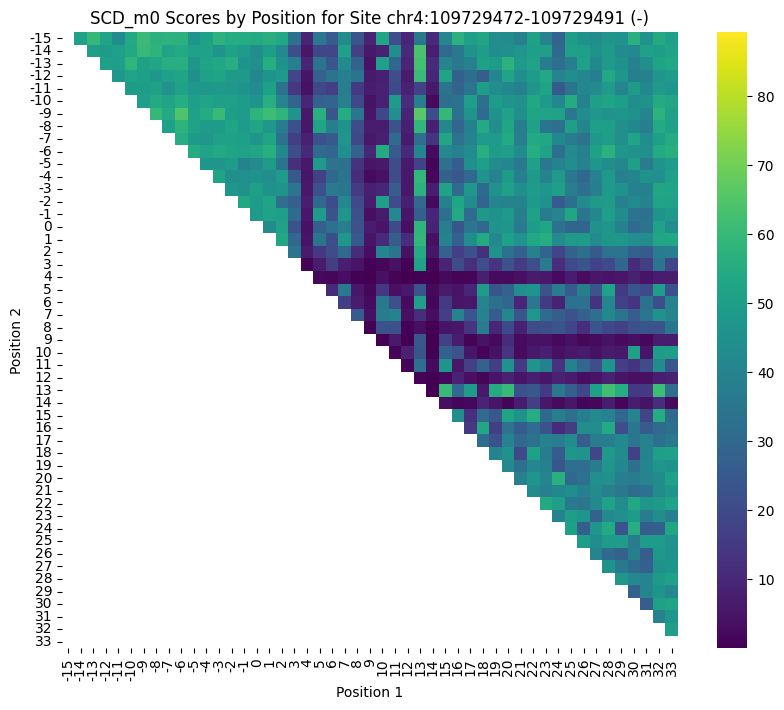

chr4 127368529 127368548 +


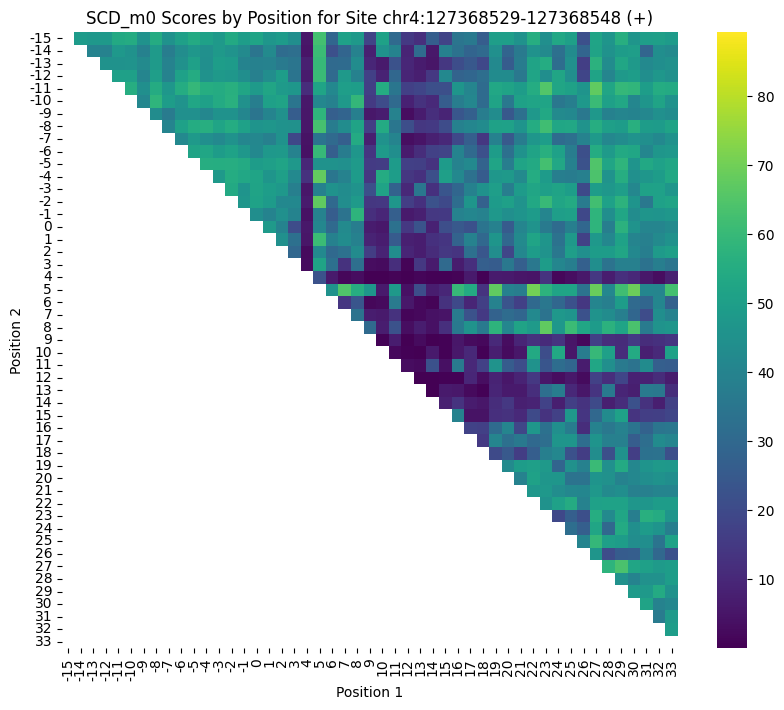

chr4 151157133 151157152 +


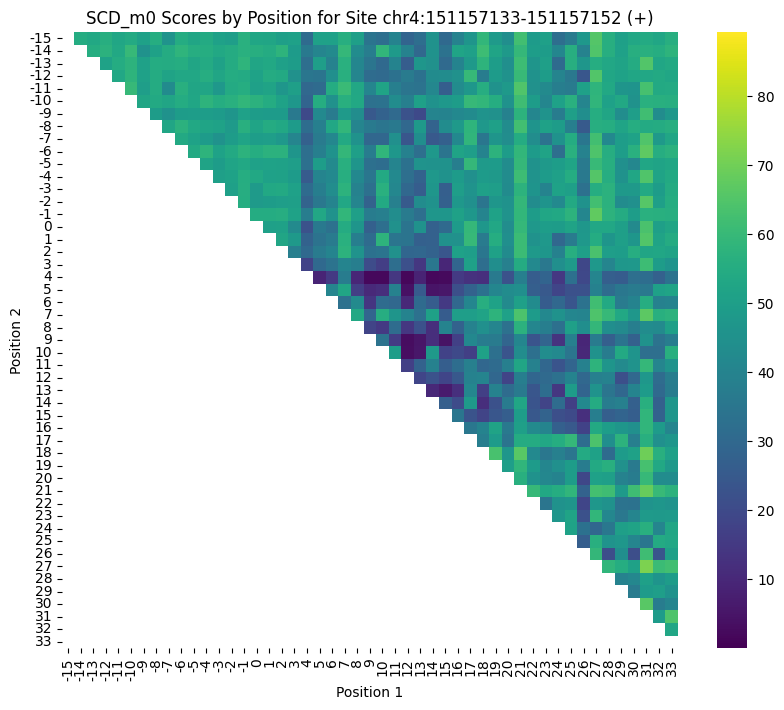

chr5 7996900 7996919 -


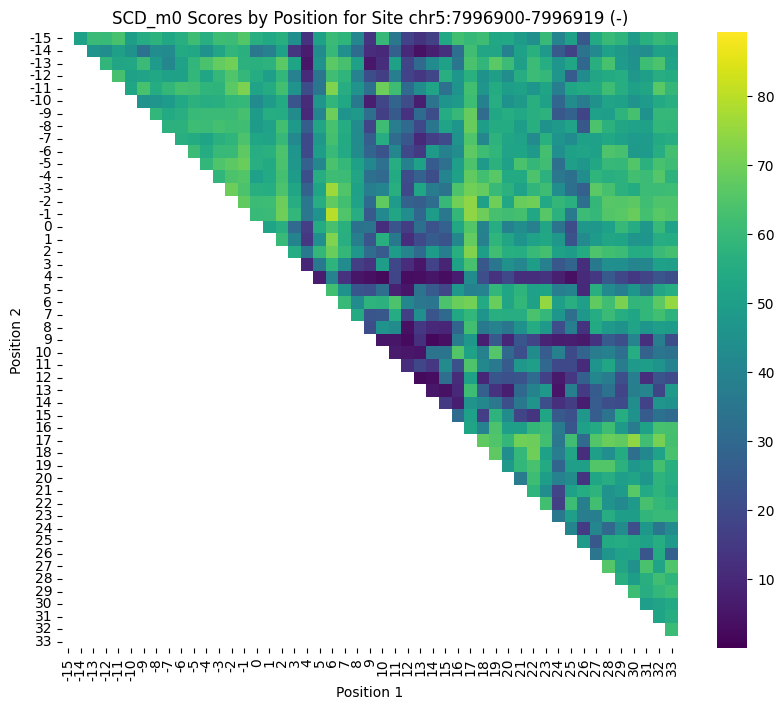

chr5 33033423 33033442 -


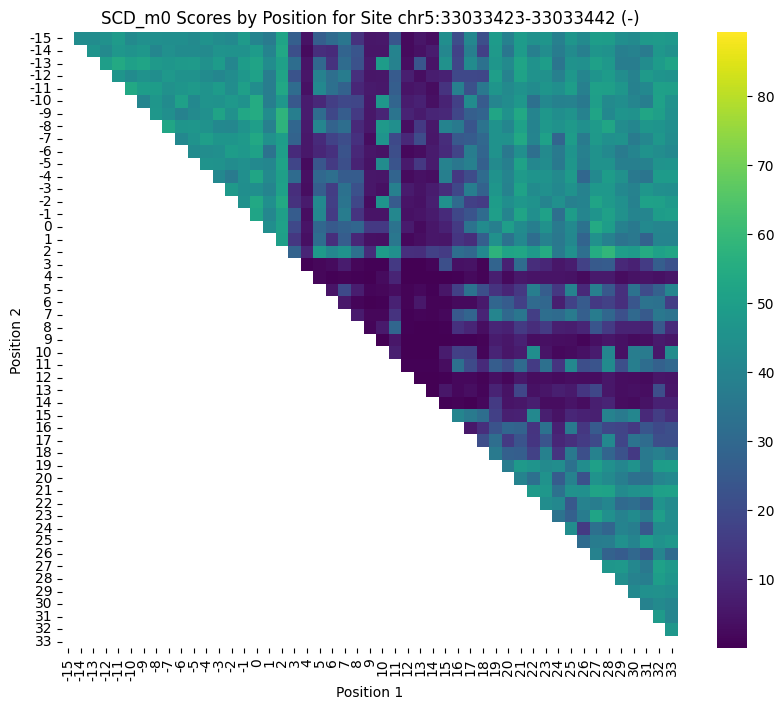

chr5 49961991 49962010 -


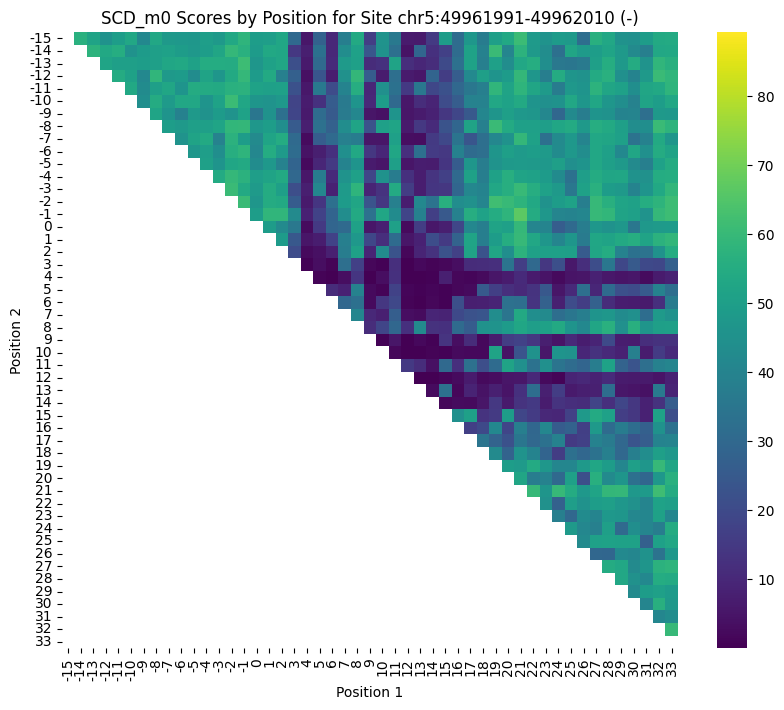

chr5 117504620 117504639 +


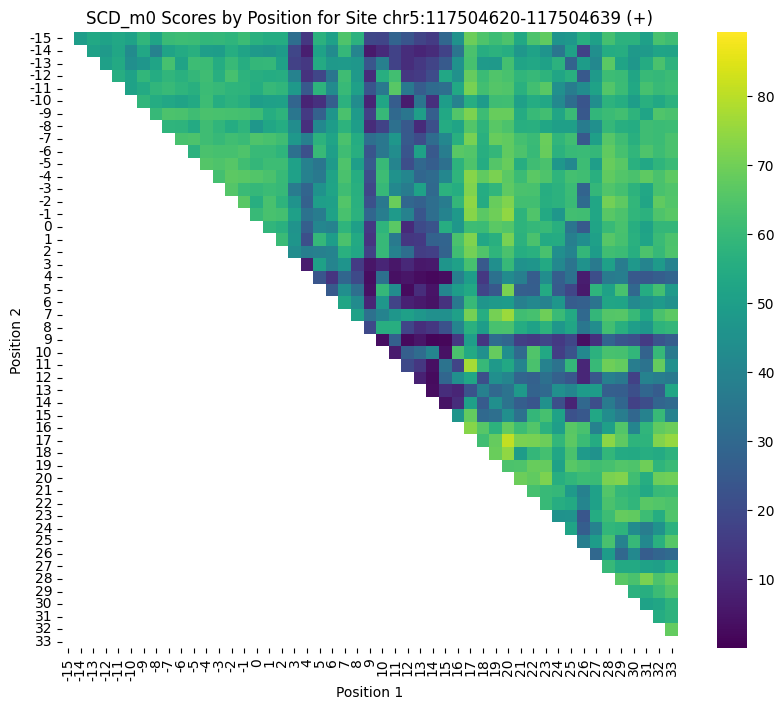

chr6 31660939 31660958 +


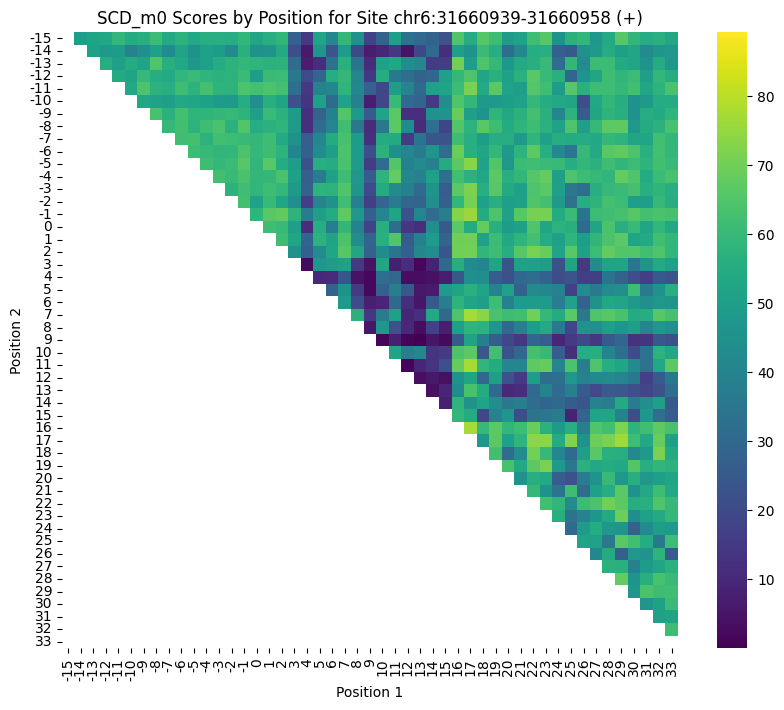

chr6 37046360 37046379 -


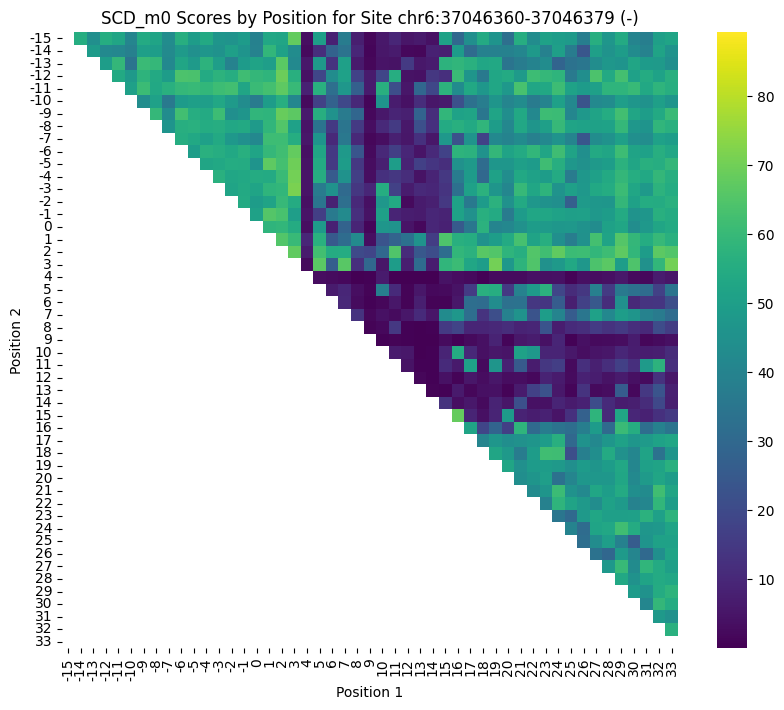

chr6 64650100 64650119 -


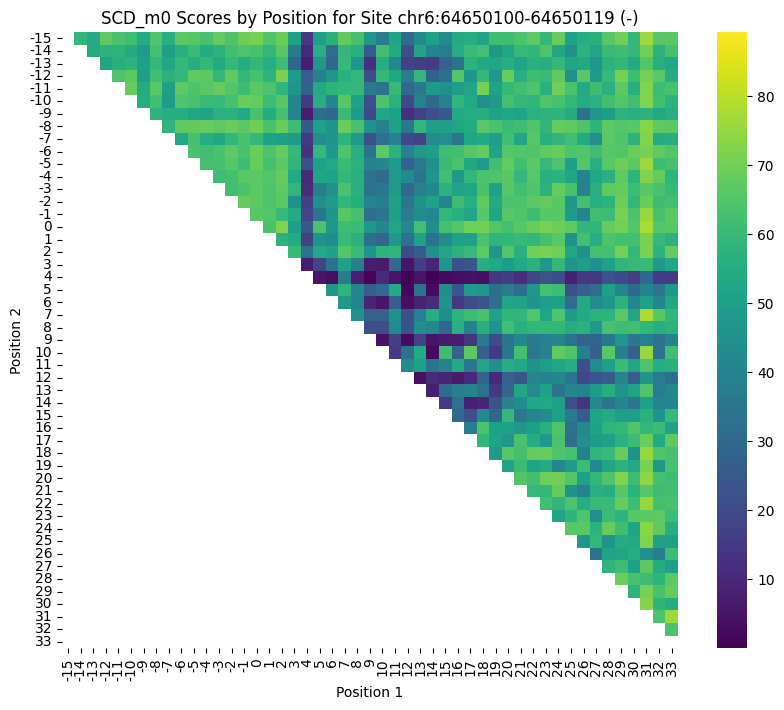

chr6 100882571 100882590 +


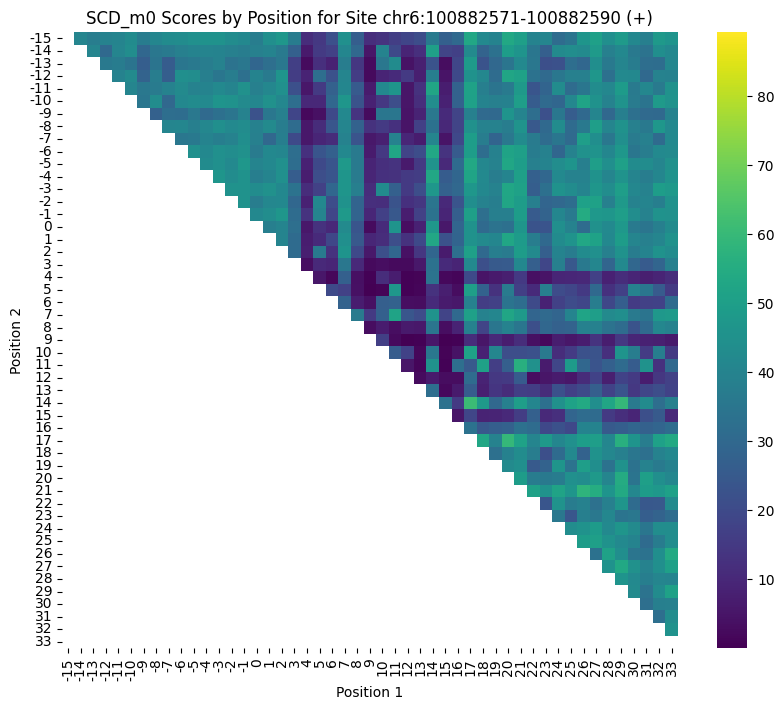

chr6 101261721 101261740 -


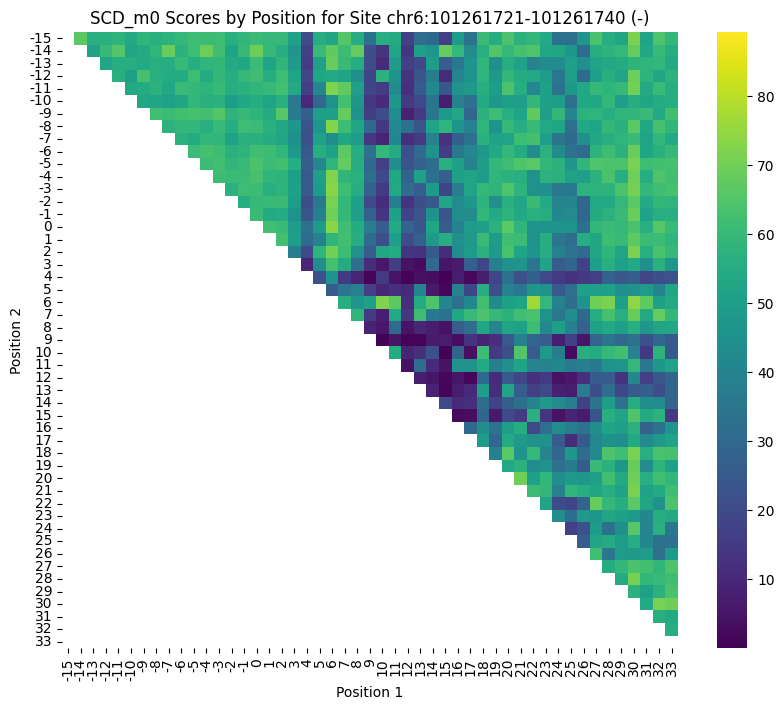

chr7 37357852 37357871 -


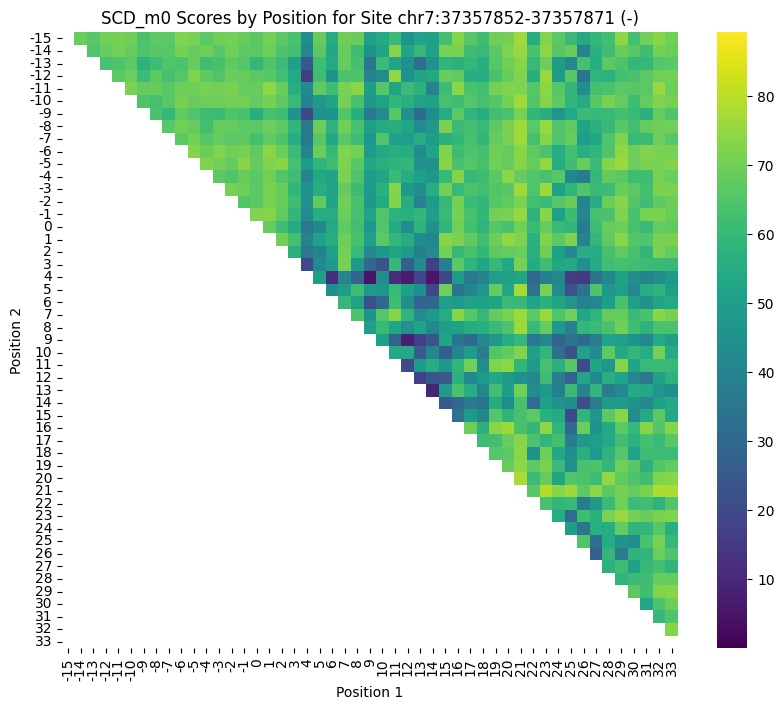

chr7 68369840 68369859 +


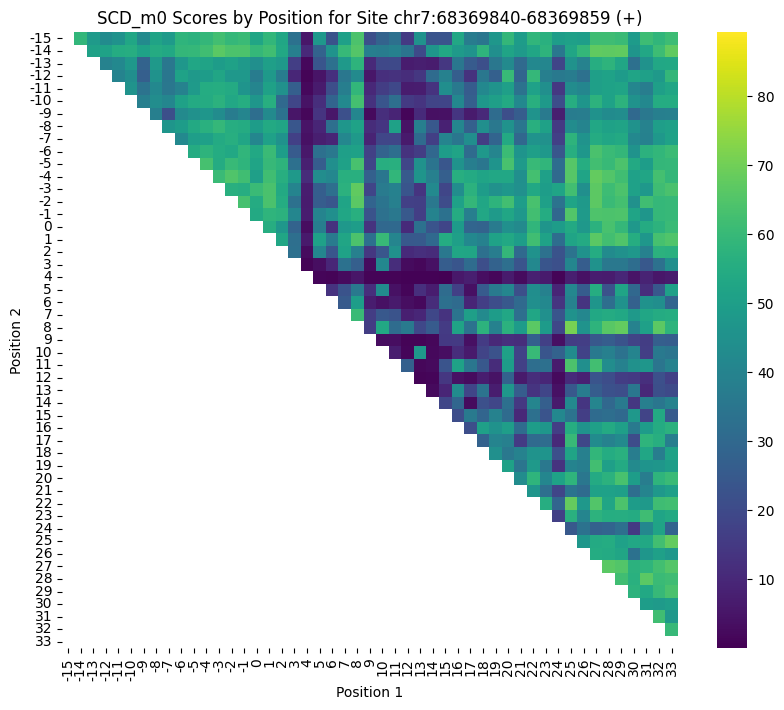

chr7 75910147 75910166 +


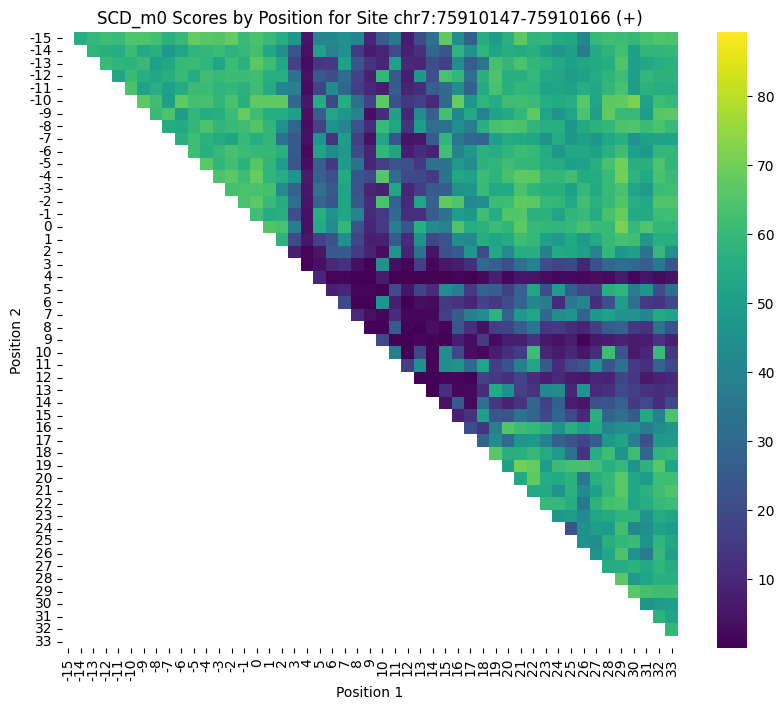

chr7 101653810 101653829 +


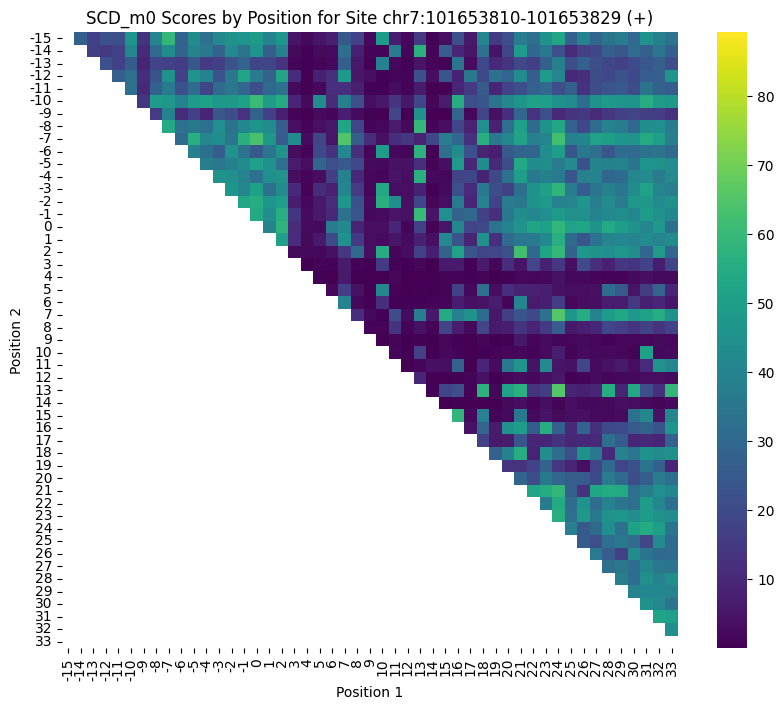

chr7 118102436 118102455 -


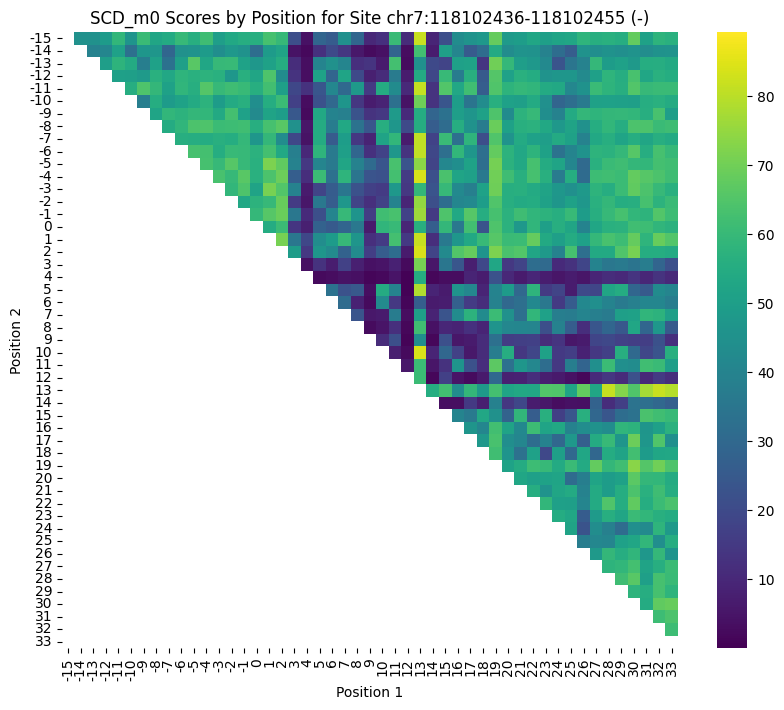

chr7 118304994 118305013 +


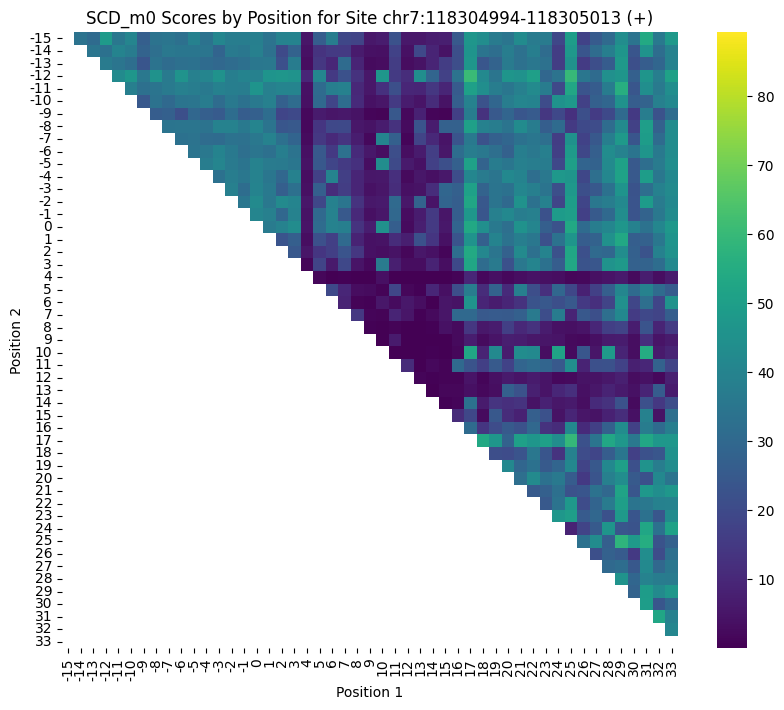

chr7 125393828 125393847 -


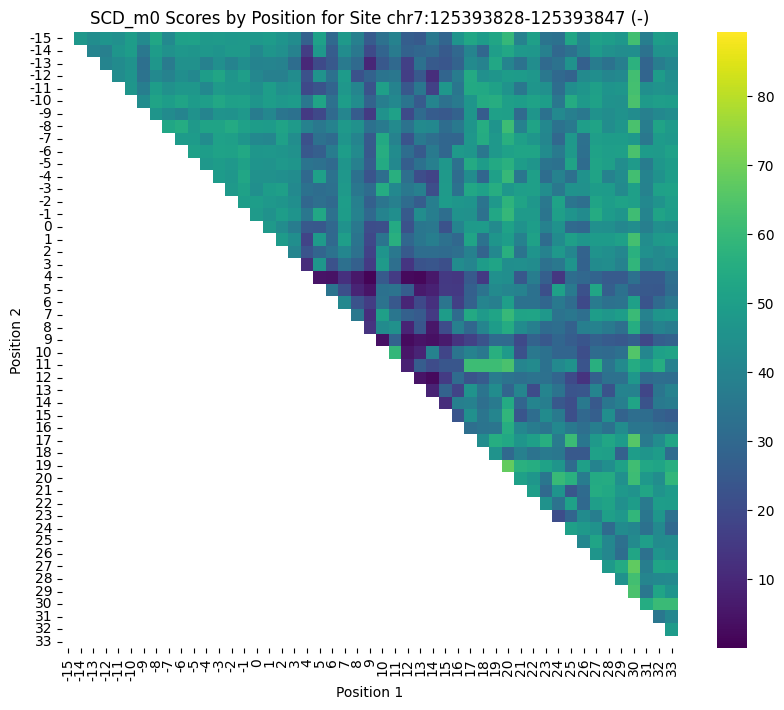

chr7 138835213 138835232 -


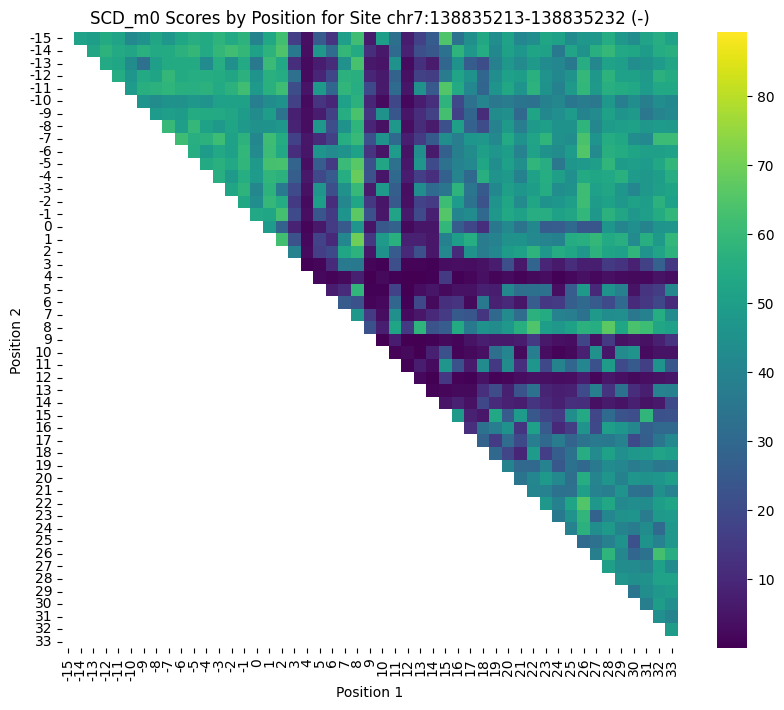

chr8 24546416 24546435 -


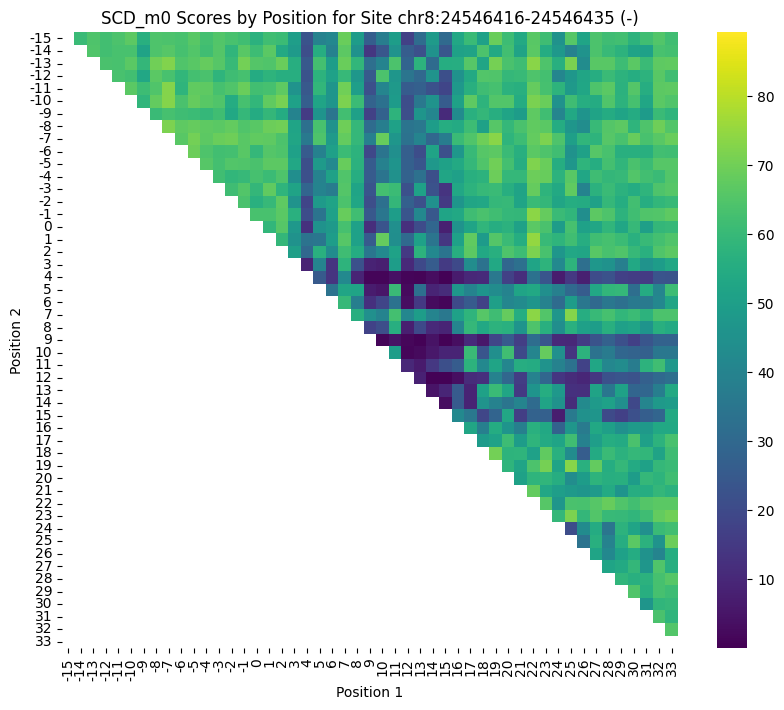

chr8 35850579 35850598 -


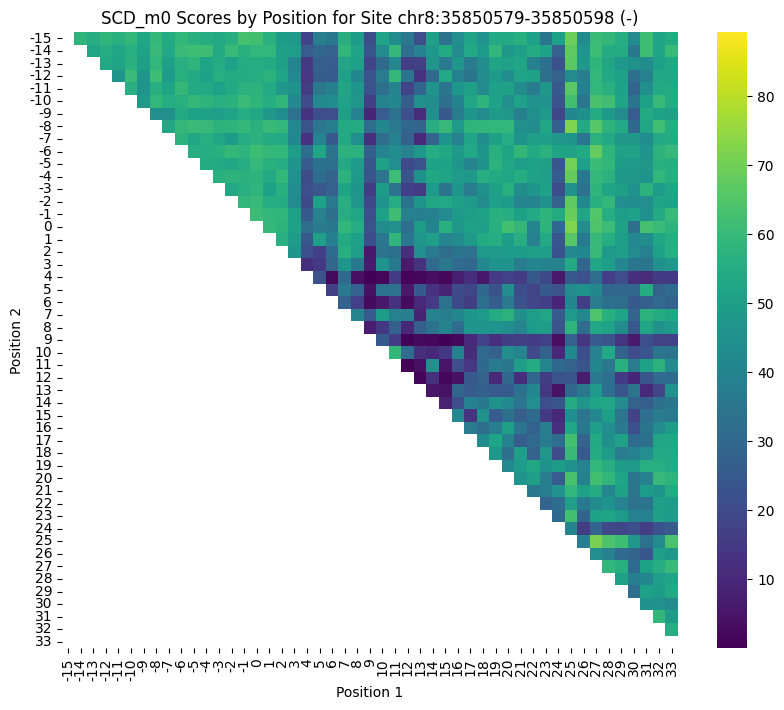

chr8 41443744 41443763 +


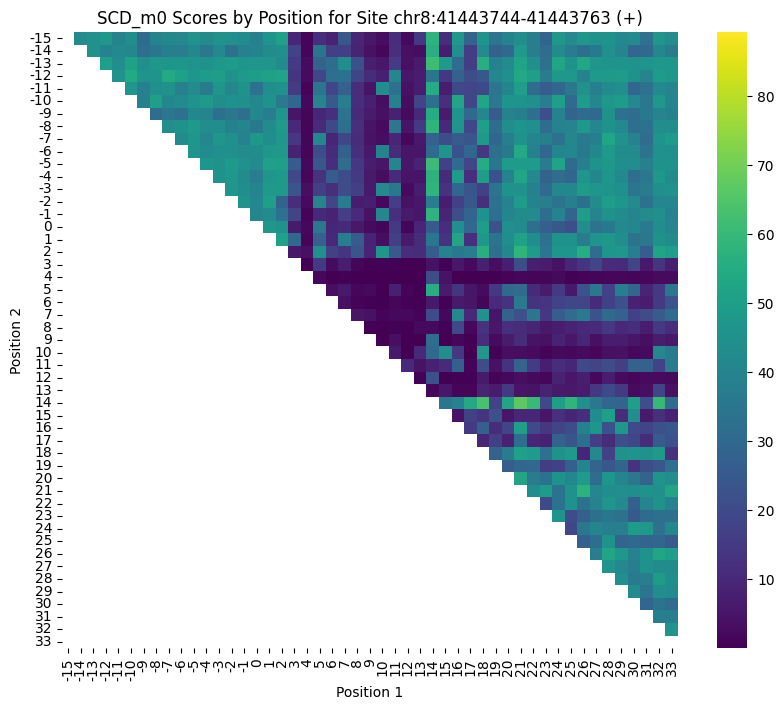

chr8 50293731 50293750 -


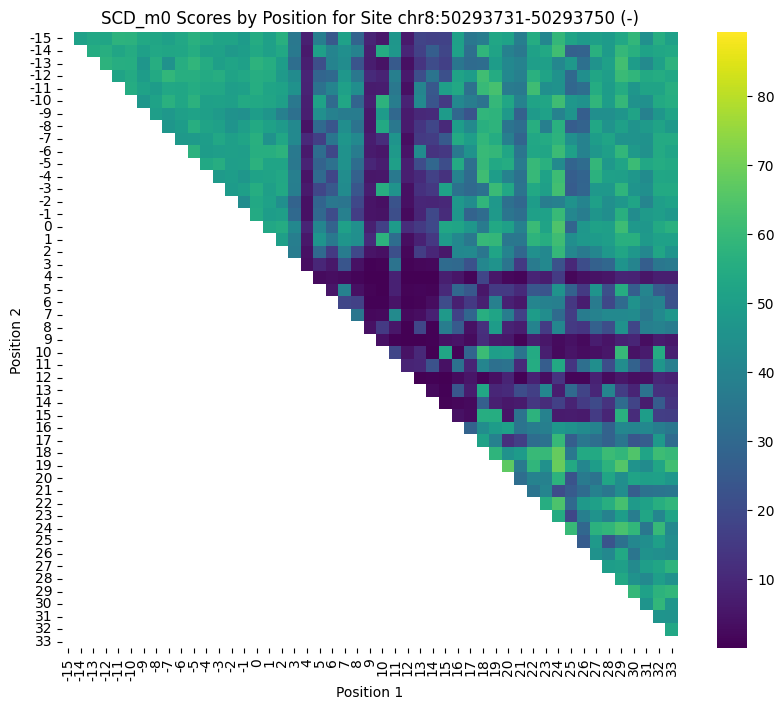

chr8 112046077 112046096 +


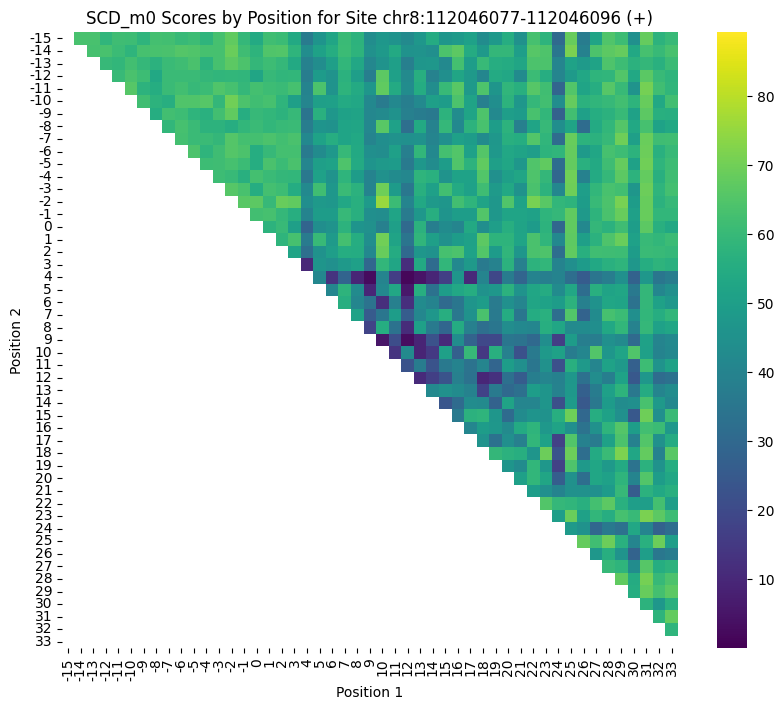

chr9 10909749 10909768 +


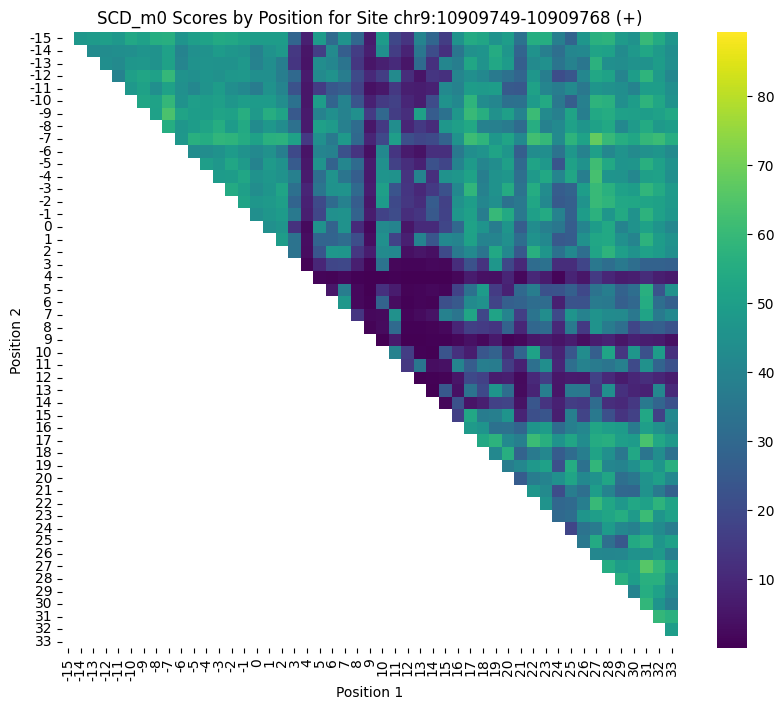

chr9 26776356 26776375 -


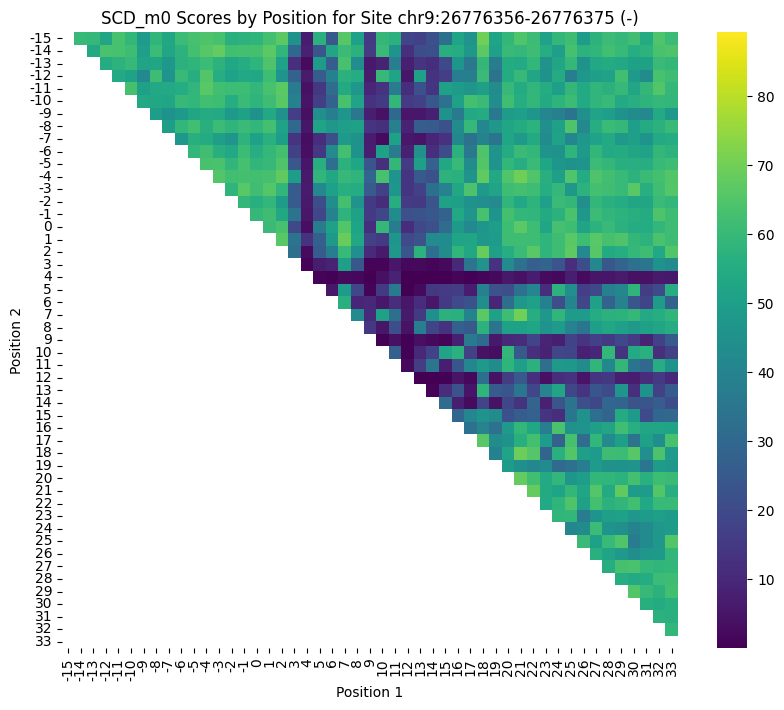

chr9 49494116 49494135 +


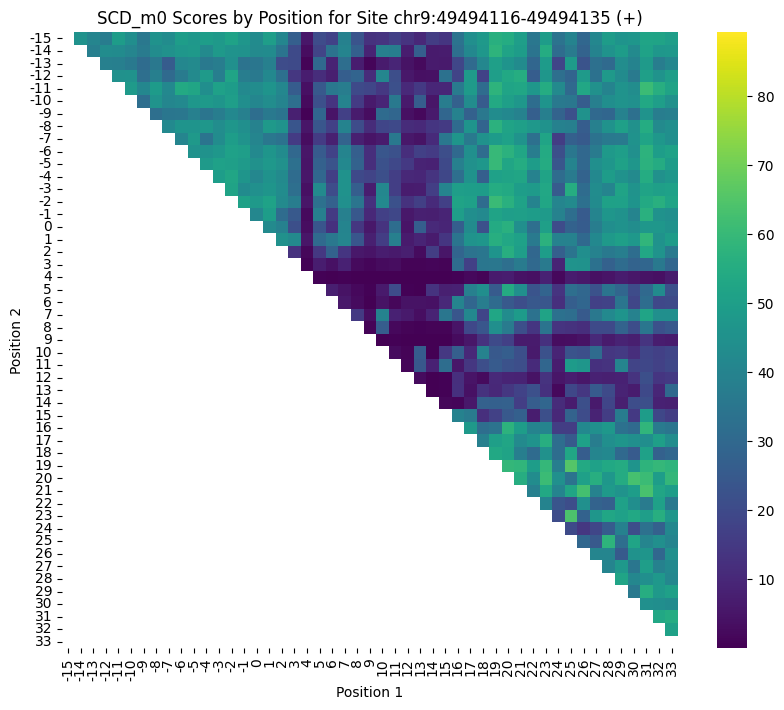

chr9 51152589 51152608 -


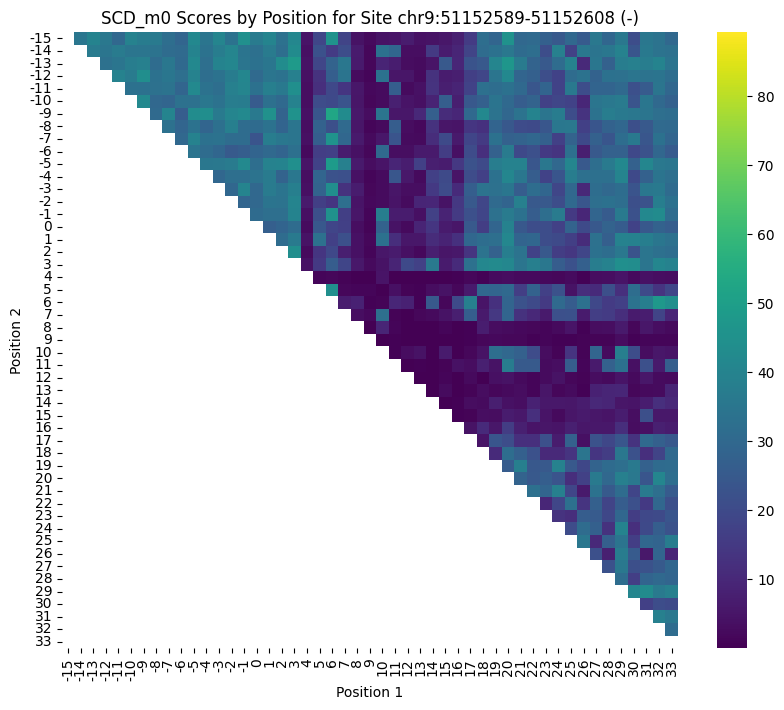

chr9 80293243 80293262 +


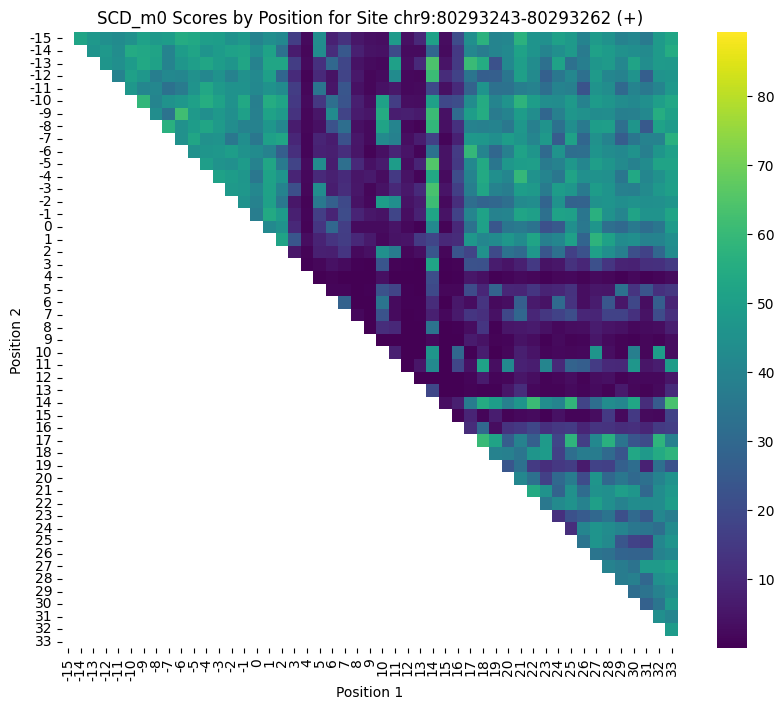

chr9 103996707 103996726 -


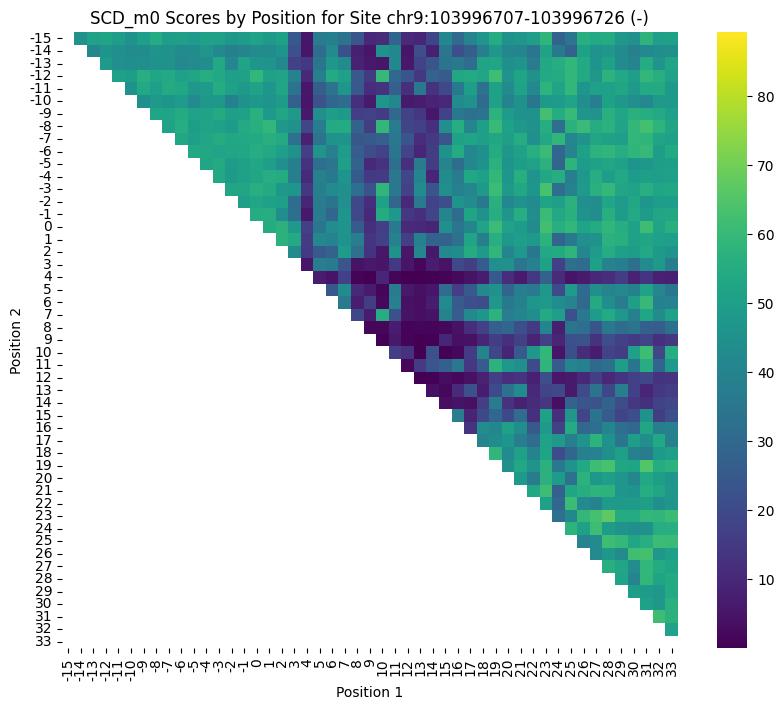

In [13]:
for (chrom, start, end, strand), group in grouped:

    print(chrom, start, end, strand)
    # Determine the range of positions for this group
    pos_min = min(group['pos1'].min(), group['pos2'].min())
    pos_max = max(group['pos1'].max(), group['pos2'].max())
    
    # Initialize a matrix to store the scores
    matrix_size = pos_max - pos_min + 1
    scores_matrix = np.nan * np.zeros((matrix_size, matrix_size))

    # Populate the matrix with SCD_m0 values
    for _, row in group.iterrows():
        x_index = row["pos1"] - pos_min
        y_index = row["pos2"] - pos_min
        scores_matrix[x_index, y_index] = row['SCD_m0']

    # Generate the plot for this group
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(scores_matrix, cmap="viridis", annot=False, square=True,
                     xticklabels=np.arange(pos_min, pos_max + 1),
                     yticklabels=np.arange(pos_min, pos_max + 1),
                     vmin=global_min_scd, vmax=global_max_scd) # Set consistent color scale
    title = f'SCD_m0 Scores by Position for Site {chrom}:{start}-{end} ({strand})'
    ax.set_title(title)
    ax.set_xlabel('Position 1')
    ax.set_ylabel('Position 2')

    plt.show()

## Plot Averaged over 100 Sites

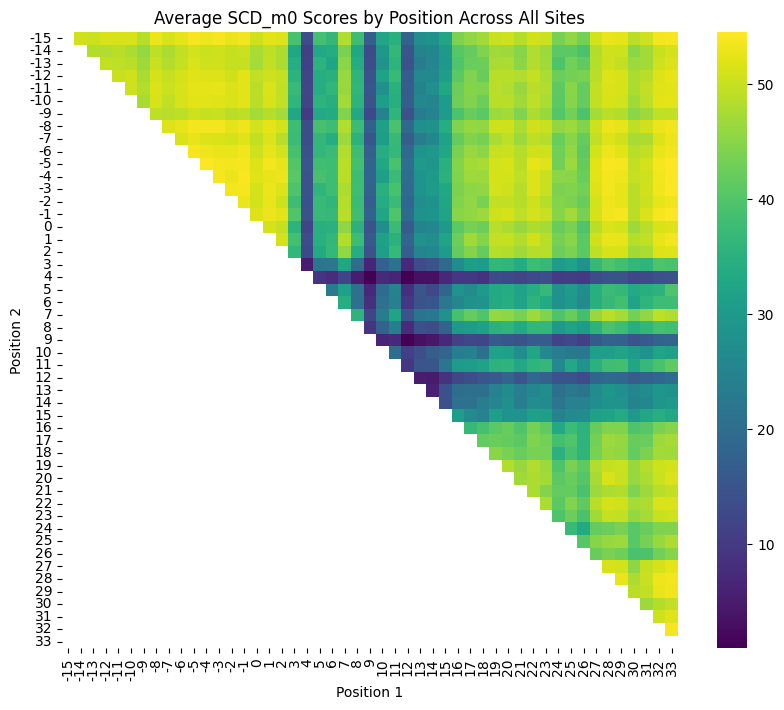

In [16]:
# Assuming `results_df` is your DataFrame
# Determine the range of positions
pos_min = min(df_m0_bg0_tg["pos1"].min(), df_m0_bg0_tg["pos2"].min())
pos_max = max(df_m0_bg0_tg["pos1"].max(), df_m0_bg0_tg["pos2"].max())

# Initialize a structure to hold cumulative scores and counts
scores_sum = {}
counts = {}

# Aggregate scores
for _, row in df_m0_bg0_tg.iterrows():
    pos1, pos2, score = row["pos1"], row["pos2"], row["SCD_m0"]
    key = (pos1, pos2)
    
    if key not in scores_sum:
        scores_sum[key] = 0
        counts[key] = 0
    
    scores_sum[key] += score
    counts[key] += 1

# Calculate average scores
average_scores = {k: scores_sum[k] / counts[k] for k in scores_sum}

# Initialize a matrix for the average scores
matrix_size = pos_max - pos_min + 1
average_scores_matrix = np.nan * np.zeros((matrix_size, matrix_size))

# Populate the matrix
for (pos1, pos2), score in average_scores.items():
    x_index = pos1 - pos_min
    y_index = pos2 - pos_min
    average_scores_matrix[x_index, y_index] = score

# Plot the average scores matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(average_scores_matrix, cmap="viridis", annot=False, square=True,
                 xticklabels=np.arange(pos_min, pos_max + 1),
                 yticklabels=np.arange(pos_min, pos_max + 1),
                 vmin=average_scores_matrix[~np.isnan(average_scores_matrix)].min(), 
                 vmax=average_scores_matrix[~np.isnan(average_scores_matrix)].max())
ax.set_title('Average SCD_m0 Scores by Position Across All Sites')
ax.set_xlabel('Position 1')
ax.set_ylabel('Position 2')

plt.show()